### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Importing dataset
#### The dataset consist of user information of a telecom company.
##### This consist of five files but this there consist the infomation needed. The rest of the files are information concerning the location, city in which the dataset is of the same location US, Califonia.

In [3]:
df1 = pd.read_excel("../Telco_customer_churn_demographics.xlsx")
df2 = pd.read_excel("../Telco_customer_churn_services.xlsx")
df3 = pd.read_excel("../Telco_customer_churn_status.xlsx")

In [4]:
df1.head()

Customer ID  Count  Gender  Age Under 30 Senior Citizen Married Dependents  \
0  8779-QRDMV      1    Male   78       No            Yes      No         No   
1  7495-OOKFY      1  Female   74       No            Yes     Yes        Yes   
2  1658-BYGOY      1    Male   71       No            Yes      No        Yes   
3  4598-XLKNJ      1  Female   78       No            Yes     Yes        Yes   
4  4846-WHAFZ      1  Female   80       No            Yes     Yes        Yes   

   Number of Dependents  
0                     0  
1                     1  
2                     3  
3                     1  
4                     1

In [5]:
df2.head()

Customer ID  Count Quarter Referred a Friend  Number of Referrals  \
0  8779-QRDMV      1      Q3                No                    0   
1  7495-OOKFY      1      Q3               Yes                    1   
2  1658-BYGOY      1      Q3                No                    0   
3  4598-XLKNJ      1      Q3               Yes                    1   
4  4846-WHAFZ      1      Q3               Yes                    1   

   Tenure in Months    Offer Phone Service  Avg Monthly Long Distance Charges  \
0                 1     None            No                               0.00   
1                 8  Offer E           Yes                              48.85   
2                18  Offer D           Yes                              11.33   
3                25  Offer C           Yes                              19.76   
4                37  Offer C           Yes                               6.33   

  Multiple Lines  ... Unlimited Data        Contract  Paperless Billing  \
0             No  ...             No  Month-to-Month                Yes   
1            Yes  ...            Yes  Month-to-Month                Yes   
2            Yes  ...            Yes  Month-to-Month                Yes   
3             No  ...            Yes  Month-to-Month                Yes   
4            Yes  ...            Yes  Month-to-Month                Yes   

    Payment Method Monthly Charge Total Charges Total Refunds  \
0  Bank Withdrawal          39.65         39.65          0.00   
1      Credit Card          80.65        633.30          0.00   
2  Bank Withdrawal          95.45       1752.55         45.61   
3  Bank Withdrawal          98.50       2514.50         13.43   
4  Bank Withdrawal          76.50       2868.15          0.00   

  Total Extra Data Charges Total Long Distance Charges Total Revenue  
0                       20                        0.00         59.65  
1                        0                      390.80       1024.10  
2                        0                      203.94       1910.88  
3                        0                      494.00       2995.07  
4                        0                      234.21       3102.36  

[5 rows x 30 columns]

In [6]:
df3.head()

Customer ID  Count Quarter  Satisfaction Score Customer Status Churn Label  \
0  8779-QRDMV      1      Q3                   3         Churned         Yes   
1  7495-OOKFY      1      Q3                   3         Churned         Yes   
2  1658-BYGOY      1      Q3                   2         Churned         Yes   
3  4598-XLKNJ      1      Q3                   2         Churned         Yes   
4  4846-WHAFZ      1      Q3                   2         Churned         Yes   

   Churn Value  Churn Score  CLTV   Churn Category  \
0            1           91  5433       Competitor   
1            1           69  5302       Competitor   
2            1           81  3179       Competitor   
3            1           88  5337  Dissatisfaction   
4            1           67  2793            Price   

                   Churn Reason  
0  Competitor offered more data  
1  Competitor made better offer  
2  Competitor made better offer  
3     Limited range of services  
4            Extra data charges

### Merging of dataset

In [7]:
df= df1.merge(df2, on=("Customer ID","Count") , how = "right").merge(df3, on=("Customer ID","Count","Quarter") , how = "right")
df.head()

Customer ID  Count  Gender  Age Under 30 Senior Citizen Married Dependents  \
0  8779-QRDMV      1    Male   78       No            Yes      No         No   
1  7495-OOKFY      1  Female   74       No            Yes     Yes        Yes   
2  1658-BYGOY      1    Male   71       No            Yes      No        Yes   
3  4598-XLKNJ      1  Female   78       No            Yes     Yes        Yes   
4  4846-WHAFZ      1  Female   80       No            Yes     Yes        Yes   

   Number of Dependents Quarter  ... Total Long Distance Charges  \
0                     0      Q3  ...                        0.00   
1                     1      Q3  ...                      390.80   
2                     3      Q3  ...                      203.94   
3                     1      Q3  ...                      494.00   
4                     1      Q3  ...                      234.21   

   Total Revenue  Satisfaction Score Customer Status Churn Label  Churn Value  \
0          59.65                   3         Churned         Yes            1   
1        1024.10                   3         Churned         Yes            1   
2        1910.88                   2         Churned         Yes            1   
3        2995.07                   2         Churned         Yes            1   
4        3102.36                   2         Churned         Yes            1   

  Churn Score  CLTV   Churn Category                  Churn Reason  
0          91  5433       Competitor  Competitor offered more data  
1          69  5302       Competitor  Competitor made better offer  
2          81  3179       Competitor  Competitor made better offer  
3          88  5337  Dissatisfaction     Limited range of services  
4          67  2793            Price            Extra data charges  

[5 rows x 45 columns]

In [8]:
 column = df.columns

### feature engineering
#### Creating age group between 30 to 64 column

In [9]:
# def age_group(row):
#     if row['Age'] <=29:
#         result = 'No'
#     elif row['Age'] >=65:
#         result = 'No'
#     else:
#         result = 'Yes'
#     return result

# df['btw_30-64'] = df.apply(age_group, axis = 1)

In [10]:
## dividing tenure into years
def tenure_group(row):
    if row['Tenure in Months'] <=12:
        result = '1 year'
    elif row['Tenure in Months'] <=24:
        result = '2 years'
    elif row['Tenure in Months'] <=36:
        result = '3 years'
    else:
        result = '4 years+'
    return result

df['Tenure'] = df.apply(tenure_group, axis = 1)

In [11]:
def Distance_call(row):
    if row['Total Long Distance Charges'] == 0:
        result = 'No'
    else:
        result = 'Yes'
    return result

df['Distance call'] = df.apply(Distance_call, axis = 1)

In [12]:
def Promo(row):
    if row['Offer'] == 'None':
        result = 'No'
    else:
        result = 'Yes'
    return result

df['Campaign'] = df.apply(Promo, axis = 1)

In [13]:
def age_group(row):
    if row['Age'] <=29:
        result = 'Under_30'
    elif row['Age'] >=65:
        result = 'Senioir_citizen'
    else:
        result = 'Young_adult'
    return result

df['age group'] = df.apply(age_group, axis = 1)

In [14]:
df = df.drop(columns=['Count', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Dependents', 'Number of Dependents', 'Quarter', 'Referred a Friend', 'Churn Score', ])

In [15]:
df.columns

Index(['Customer ID', 'Married', 'Number of Referrals', 'Tenure in Months',
       'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charge',
       'Total Charges', 'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score',
       'Customer Status', 'Churn Label', 'Churn Value', 'CLTV',
       'Churn Category', 'Churn Reason', 'Tenure', 'Distance call', 'Campaign',
       'age group'],
      dtype='object')

In [45]:
df.head()

Customer ID Married  Number of Referrals  Tenure in Months    Offer  \
0  8779-QRDMV      No                    0                 1     None   
1  7495-OOKFY     Yes                    1                 8  Offer E   
2  1658-BYGOY      No                    0                18  Offer D   
3  4598-XLKNJ     Yes                    1                25  Offer C   
4  4846-WHAFZ     Yes                    1                37  Offer C   

  Phone Service  Avg Monthly Long Distance Charges Multiple Lines  \
0            No                               0.00             No   
1           Yes                              48.85            Yes   
2           Yes                              11.33            Yes   
3           Yes                              19.76             No   
4           Yes                               6.33            Yes   

  Internet Service Internet Type  ...  Customer Status Churn Label  \
0              Yes           DSL  ...          Churned         Yes   
1              Yes   Fiber Optic  ...          Churned         Yes   
2              Yes   Fiber Optic  ...          Churned         Yes   
3              Yes   Fiber Optic  ...          Churned         Yes   
4              Yes   Fiber Optic  ...          Churned         Yes   

  Churn Value  CLTV   Churn Category                  Churn Reason    Tenure  \
0           1  5433       Competitor  Competitor offered more data    1 year   
1           1  5302       Competitor  Competitor made better offer    1 year   
2           1  3179       Competitor  Competitor made better offer   2 years   
3           1  5337  Dissatisfaction     Limited range of services   3 years   
4           1  2793            Price            Extra data charges  4 years+   

  Distance call Campaign        age group  
0            No       No  Senioir_citizen  
1           Yes      Yes  Senioir_citizen  
2           Yes      Yes  Senioir_citizen  
3           Yes      Yes  Senioir_citizen  
4           Yes      Yes  Senioir_citizen  

[5 rows x 39 columns]

In [57]:
dcol= ['Phone Service','Multiple Lines', 'Internet Service',
     'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 
        'Distance call', 'Campaign']

In [65]:
df = df.drop(columns = ['No_of_Product'] )

In [68]:
# def dcount(row):
#     if row['Phone Service','Multiple Lines', 'Internet Service',
#      'Online Security', 'Online Backup',
#        'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
#        'Streaming Movies', 'Streaming Music', 'Unlimited Data', 
#         'Distance call', 'Campaign'] == 'Yes':
#         result = count('Yes')
#     else:
#         result = 0
#     return result

# df['product'] = df.apply(dcount, axis = 1)

KeyError: 'key of type tuple not found and not a MultiIndex'

In [67]:
# df['No_of_Product'] = [len(df[df[x]=='Yes']) for x in dcol]

ValueError: Length of values (13) does not match length of index (7043)

In [66]:
df.head(10)

Customer ID Married  Number of Referrals  Tenure in Months    Offer  \
0  8779-QRDMV      No                    0                 1     None   
1  7495-OOKFY     Yes                    1                 8  Offer E   
2  1658-BYGOY      No                    0                18  Offer D   
3  4598-XLKNJ     Yes                    1                25  Offer C   
4  4846-WHAFZ     Yes                    1                37  Offer C   
5  4412-YLTKF      No                    0                27  Offer C   
6  0390-DCFDQ     Yes                    1                 1  Offer E   
7  3445-HXXGF     Yes                    6                58  Offer B   
8  2656-FMOKZ      No                    0                15  Offer D   
9  2070-FNEXE      No                    0                 7  Offer E   

  Phone Service  Avg Monthly Long Distance Charges Multiple Lines  \
0            No                               0.00             No   
1           Yes                              48.85            Yes   
2           Yes                              11.33            Yes   
3           Yes                              19.76             No   
4           Yes                               6.33            Yes   
5           Yes                               3.33            Yes   
6           Yes                              15.28             No   
7            No                               0.00             No   
8           Yes                              44.07            Yes   
9           Yes                              26.95             No   

  Internet Service Internet Type  ...  Customer Status Churn Label  \
0              Yes           DSL  ...          Churned         Yes   
1              Yes   Fiber Optic  ...          Churned         Yes   
2              Yes   Fiber Optic  ...          Churned         Yes   
3              Yes   Fiber Optic  ...          Churned         Yes   
4              Yes   Fiber Optic  ...          Churned         Yes   
5              Yes   Fiber Optic  ...          Churned         Yes   
6              Yes   Fiber Optic  ...          Churned         Yes   
7              Yes           DSL  ...          Churned         Yes   
8              Yes   Fiber Optic  ...          Churned         Yes   
9              Yes   Fiber Optic  ...          Churned         Yes   

  Churn Value  CLTV   Churn Category  \
0           1  5433       Competitor   
1           1  5302       Competitor   
2           1  3179       Competitor   
3           1  5337  Dissatisfaction   
4           1  2793            Price   
5           1  4638       Competitor   
6           1  3964            Other   
7           1  5444  Dissatisfaction   
8           1  5717  Dissatisfaction   
9           1  4419            Price   

                               Churn Reason    Tenure Distance call Campaign  \
0              Competitor offered more data    1 year            No       No   
1              Competitor made better offer    1 year           Yes      Yes   
2              Competitor made better offer   2 years           Yes      Yes   
3                 Limited range of services   3 years           Yes      Yes   
4                        Extra data charges  4 years+           Yes      Yes   
5             Competitor had better devices   3 years           Yes      Yes   
6                                Don't know    1 year           Yes      Yes   
7                   Service dissatisfaction  4 years+            No      Yes   
8                 Limited range of services   2 years           Yes      Yes   
9  Lack of affordable download/upload speed    1 year           Yes      Yes   

         age group  
0  Senioir_citizen  
1  Senioir_citizen  
2  Senioir_citizen  
3  Senioir_citizen  
4  Senioir_citizen  
5  Senioir_citizen  
6  Senioir_citizen  
7  Senioir_citizen  
8  Senioir_citizen  
9  Senioir_citizen  

[10 rows x 39 columns]

In [113]:
#ratings=df.groupby(['Campaign','Internet Service', 'Churn Value']).size().reset_index().rename(columns={0:'Rating Count'})
#ratings
#df[df['Churn Label']=='Yes'].groupby('Offer').size().reset_index()
#df[df['Churn Label']=='No'].groupby('Internet Type').size().reset_index()
# yes
df.groupby(['Offer','Churn Label']).size().reset_index().rename(columns={0:'Rating Count'})

#df[['Internet Service', 'Churn Value']].groupby(df['Offer']).size().reset_index()

Offer  Churn Label  Rating Count
0      None            0          2826
1      None            1          1051
2   Offer A            0           485
3   Offer A            1            35
4   Offer B            0           723
5   Offer B            1           101
6   Offer C            0           320
7   Offer C            1            95
8   Offer D            0           441
9   Offer D            1           161
10  Offer E            0           379
11  Offer E            1           426

In [102]:
Offers = df.groupby('Offer') \
                            .agg(min_Rev = ('Total Revenue', 'min'), \
                                 mean_Rev = ('Total Revenue', 'mean'),
                                 max_Rev = ('Total Revenue', 'max')).round(2)

print(Offers)

         min_Rev  mean_Rev   max_Rev
Offer                               
None       21.40   2926.85  11688.90
Offer A  1579.34   7029.27  11979.34
Offer B   820.90   5082.42  10184.55
Offer C   454.15   2759.25   6027.64
Offer D   212.85   1315.73   3273.07
Offer E    21.36    302.42   1351.16


In [12]:
df.isnull().sum()

Customer ID                             0
Count                                   0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support              

In [38]:
df = df.to_csv("../main_df.csv", index = False)

In [46]:
df.describe().T

count         mean          std      min  \
Number of Referrals                7043.0     1.951867     3.001199     0.00   
Tenure in Months                   7043.0    32.386767    24.542061     1.00   
Avg Monthly Long Distance Charges  7043.0    22.958954    15.448113     0.00   
Avg Monthly GB Download            7043.0    20.515405    20.418940     0.00   
Monthly Charge                     7043.0    64.761692    30.090047    18.25   
Total Charges                      7043.0  2280.381264  2266.220462    18.80   
Total Refunds                      7043.0     1.962182     7.902614     0.00   
Total Extra Data Charges           7043.0     6.860713    25.104978     0.00   
Total Long Distance Charges        7043.0   749.099262   846.660055     0.00   
Total Revenue                      7043.0  3034.379056  2865.204542    21.36   
Satisfaction Score                 7043.0     3.244924     1.201657     1.00   
Churn Value                        7043.0     0.265370     0.441561     0.00   
CLTV                               7043.0  4400.295755  1183.057152  2003.00   

                                        25%      50%       75%       max  
Number of Referrals                   0.000     0.00     3.000     11.00  
Tenure in Months                      9.000    29.00    55.000     72.00  
Avg Monthly Long Distance Charges     9.210    22.89    36.395     49.99  
Avg Monthly GB Download               3.000    17.00    27.000     85.00  
Monthly Charge                       35.500    70.35    89.850    118.75  
Total Charges                       400.150  1394.55  3786.600   8684.80  
Total Refunds                         0.000     0.00     0.000     49.79  
Total Extra Data Charges              0.000     0.00     0.000    150.00  
Total Long Distance Charges          70.545   401.44  1191.100   3564.72  
Total Revenue                       605.610  2108.64  4801.145  11979.34  
Satisfaction Score                    3.000     3.00     4.000      5.00  
Churn Value                           0.000     0.00     1.000      1.00  
CLTV                               3469.000  4527.00  5380.500   6500.00

In [47]:
df.describe(include='O').T

count unique                            top  freq
Customer ID             7043   7043                     8779-QRDMV     1
Married                 7043      2                             No  3641
Offer                   7043      6                           None  3877
Phone Service           7043      2                            Yes  6361
Multiple Lines          7043      2                             No  4072
Internet Service        7043      2                            Yes  5517
Internet Type           7043      4                    Fiber Optic  3035
Online Security         7043      2                             No  5024
Online Backup           7043      2                             No  4614
Device Protection Plan  7043      2                             No  4621
Premium Tech Support    7043      2                             No  4999
Streaming TV            7043      2                             No  4336
Streaming Movies        7043      2                             No  4311
Streaming Music         7043      2                             No  4555
Unlimited Data          7043      2                            Yes  4745
Contract                7043      3                 Month-to-Month  3610
Paperless Billing       7043      2                            Yes  4171
Payment Method          7043      3                Bank Withdrawal  3909
Customer Status         7043      3                         Stayed  4720
Churn Label             7043      2                             No  5174
Churn Category          1869      5                     Competitor   841
Churn Reason            1869     20  Competitor had better devices   313
Tenure                  7043      4                       4 years+  3001
Distance call           7043      2                            Yes  6361
Campaign                7043      2                             No  3877
age group               7043      3                    Young_adult  4500

### Droping some features

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Married                            7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              7043 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      7043 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [49]:
df.isnull().sum()

Customer ID                             0
Married                                 0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                          0
Monthly Charge                          0
Total Charges                     

In [15]:
df.tail()

Customer ID  Count  Gender  Age Under 30 Senior Citizen Married  \
7038  2569-WGERO      1  Female   30       No             No      No   
7039  6840-RESVB      1    Male   38       No             No     Yes   
7040  2234-XADUH      1  Female   30       No             No     Yes   
7041  4801-JZAZL      1  Female   32       No             No     Yes   
7042  3186-AJIEK      1    Male   44       No             No      No   

     Dependents  Number of Dependents Quarter  ... Satisfaction Score  \
7038         No                     0      Q3  ...                  5   
7039        Yes                     2      Q3  ...                  3   
7040        Yes                     2      Q3  ...                  4   
7041        Yes                     2      Q3  ...                  4   
7042         No                     0      Q3  ...                  4   

      Customer Status  Churn Label Churn Value Churn Score  CLTV  \
7038           Stayed           No           0          45  5306   
7039           Stayed           No           0          59  2140   
7040           Stayed           No           0          71  5560   
7041           Stayed           No           0          59  2793   
7042           Stayed           No           0          38  5097   

     Churn Category Churn Reason btw_30-64    Tenure  
7038            NaN          NaN       Yes  4 years+  
7039            NaN          NaN       Yes   2 years  
7040            NaN          NaN       Yes  4 years+  
7041            NaN          NaN       Yes    1 year  
7042            NaN          NaN       Yes  4 years+  

[5 rows x 47 columns]

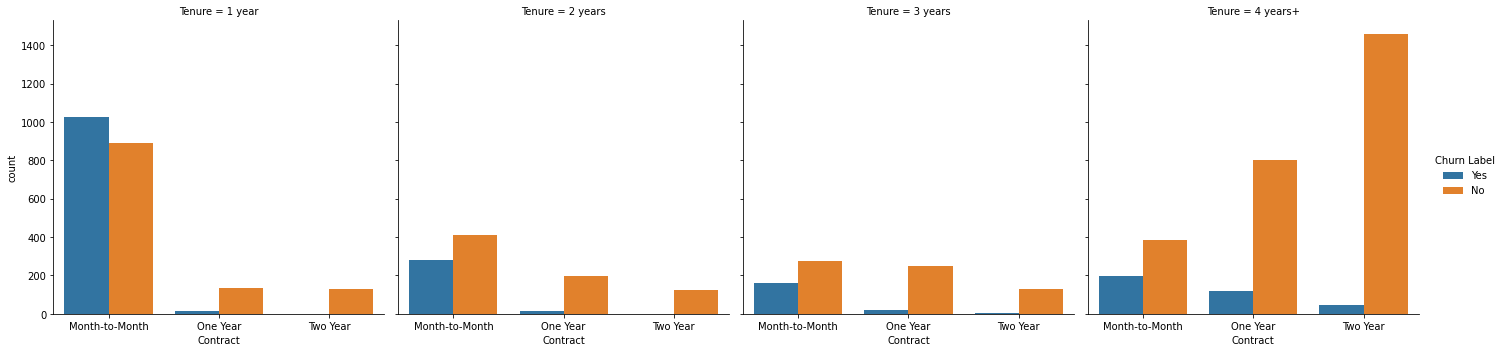

In [16]:
sns.catplot(x='Contract', hue='Churn Label', col='Tenure', kind='count', data=df)

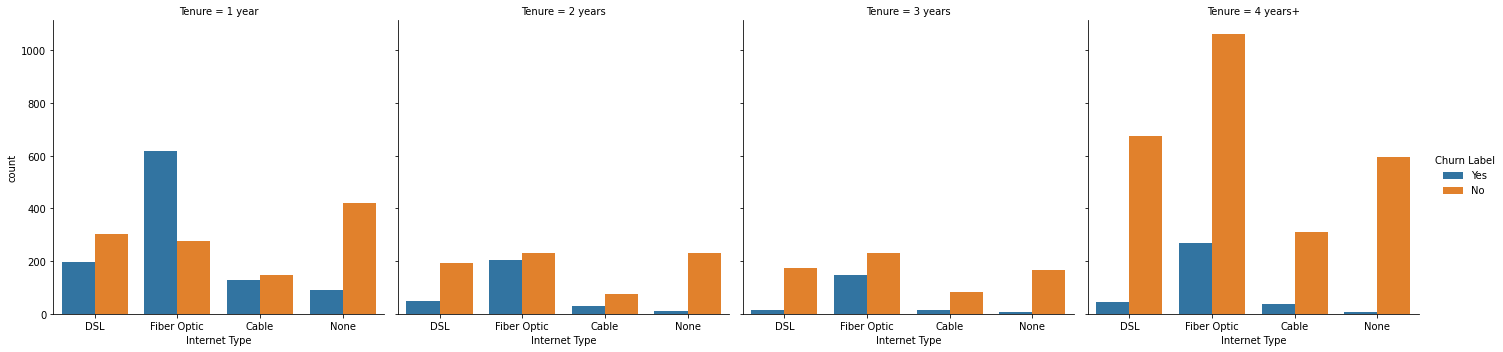

In [17]:
sns.catplot(x='Internet Type', hue='Churn Label', col='Tenure', kind='count', data=df)

In [18]:
# df_cor = df.corr()
# df_cor.style.background_gradient(cmap= 'coolwarm')

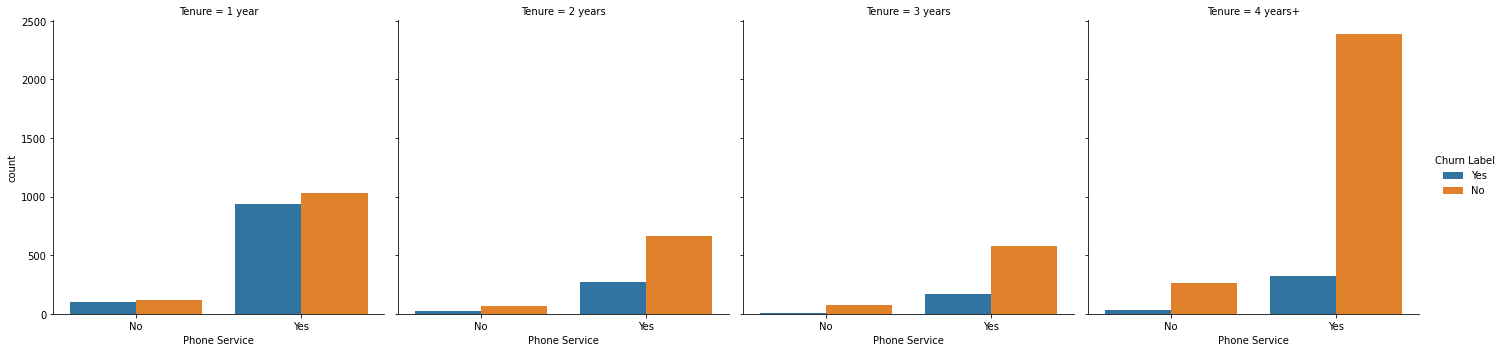

In [19]:
sns.catplot(x='Phone Service', hue='Churn Label', col='Tenure', kind='count', data=df)

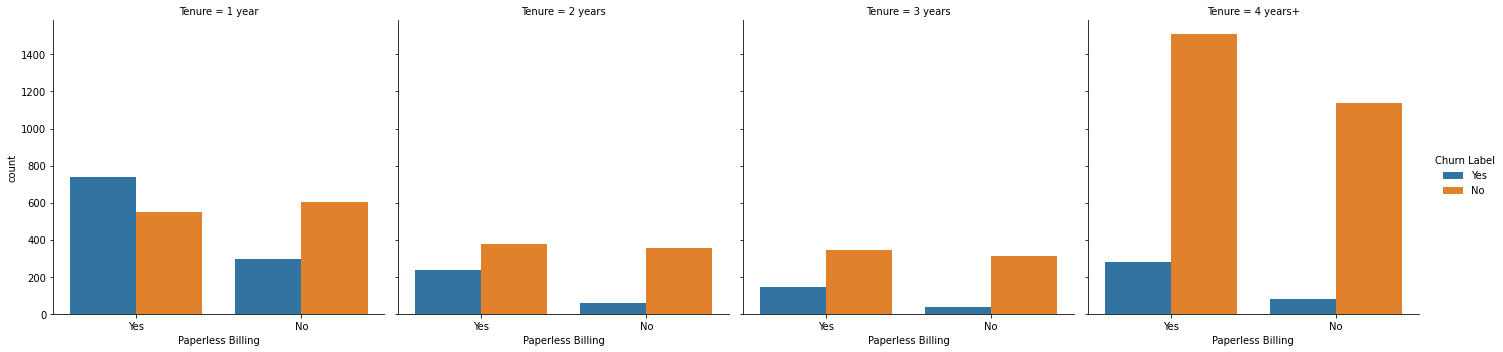

In [20]:
sns.catplot(x='Paperless Billing', hue='Churn Label', col='Tenure', kind='count', data=df)

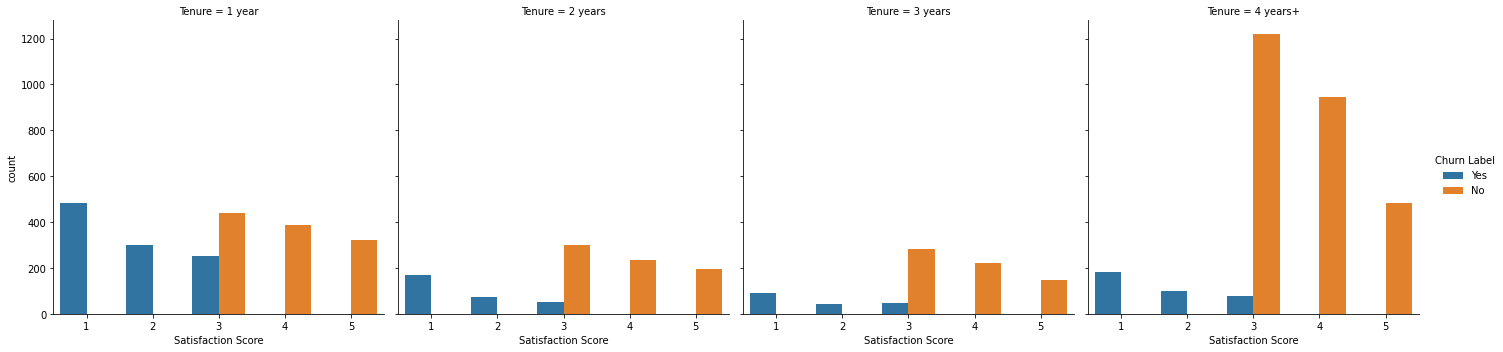

In [21]:
sns.catplot(x='Satisfaction Score', hue='Churn Label', col='Tenure', kind='count', data=df)

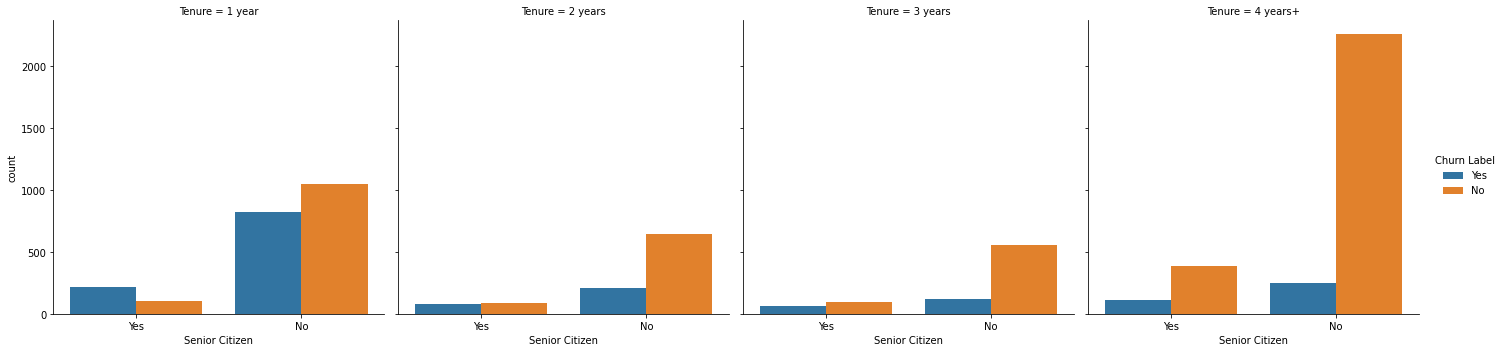

In [22]:
sns.catplot(x='Senior Citizen', hue='Churn Label', col='Tenure', kind='count', data=df)

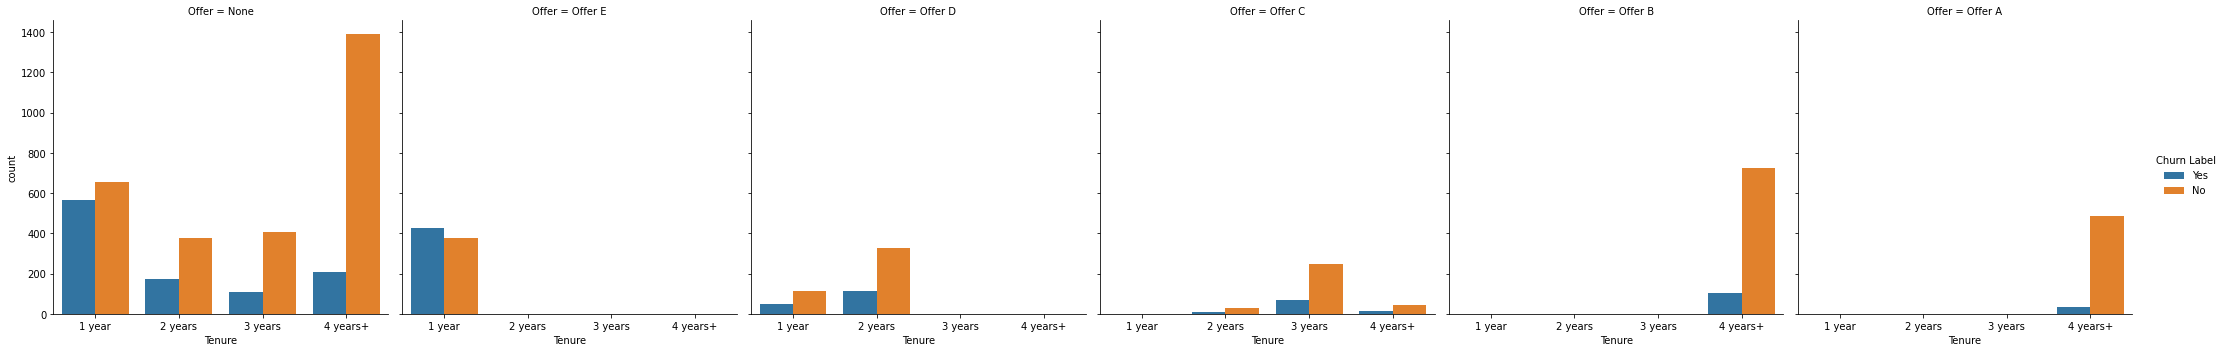

In [23]:
sns.catplot(x='Tenure', hue='Churn Label', col='Offer', kind='count', data=df)

In [24]:
# plt.scatter(Monthly Charge, y, label= "stars", color= "green",
#             marker= "*", s=30)

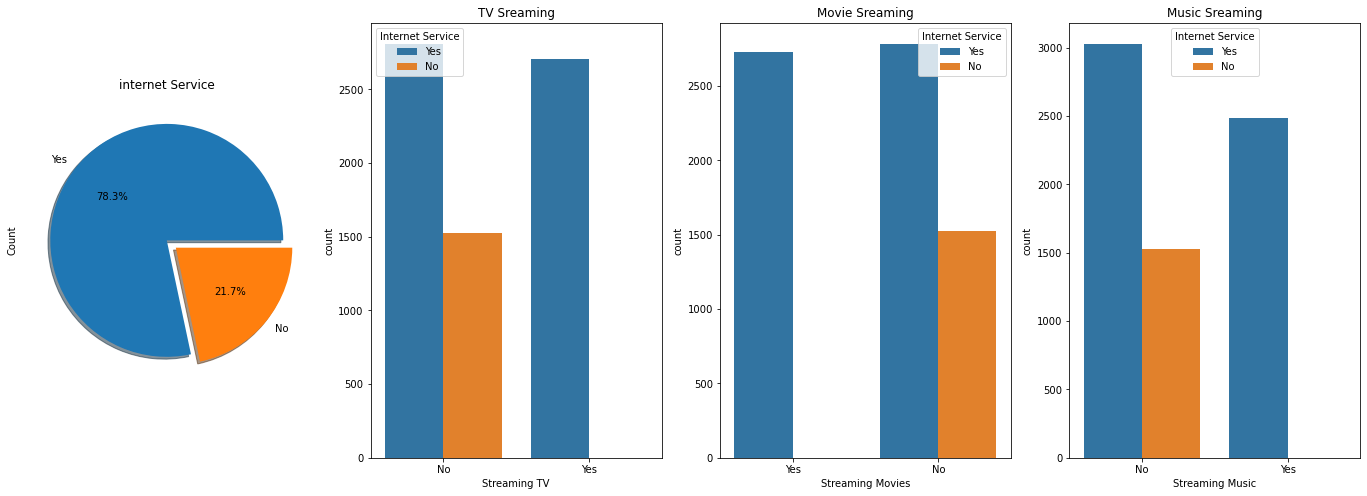

In [31]:
f,ax=plt.subplots(1,4,figsize=(24,8))
df['Internet Service'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0], shadow=True)
ax[0].set_title('internet Service')
ax[0].set_ylabel('Count')
sns.countplot('Streaming TV',hue='Internet Service',data=df,ax=ax[1])
ax[1].set_title('TV Sreaming')
sns.countplot('Streaming Movies',hue='Internet Service',data=df,ax=ax[2])
ax[2].set_title('Movie Sreaming')
sns.countplot('Streaming Music',hue='Internet Service',data=df,ax=ax[3])
ax[3].set_title('Music Sreaming')
plt.show()

<AxesSubplot:xlabel='Internet Service', ylabel='Monthly Charge'>

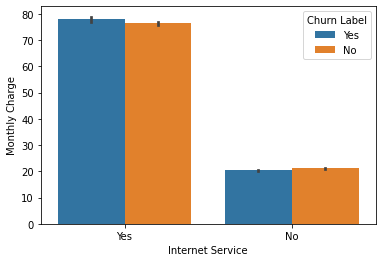

In [26]:
#sns.relplot(x='Monthly Charge', y='hosting_c', hue='Churn Label',data =Airbnb_data[(Airbnb_data.room_type == 'Private room')])
sns.barplot(x='Internet Service', y='Monthly Charge', hue='Churn Label',data =df)

<AxesSubplot:xlabel='Satisfaction Score', ylabel='count'>

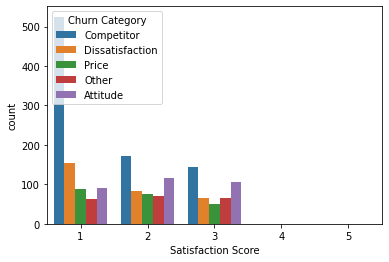

In [38]:
#sns.relplot(x='Monthly Charge', y='hosting_c', hue='Churn Label',data =Airbnb_data[(Airbnb_data.room_type == 'Private room')])
co=['Customer ID', 'Count', 'Gender', 'Age', 'Under 30', 'Senior Citizen',
       'Married', 'Dependents', 'Number of Dependents', 'Quarter',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason',
       'btw_30-64', 'Tenure']
sns.countplot('Satisfaction Score', hue='Churn Category',data =df)

<AxesSubplot:>

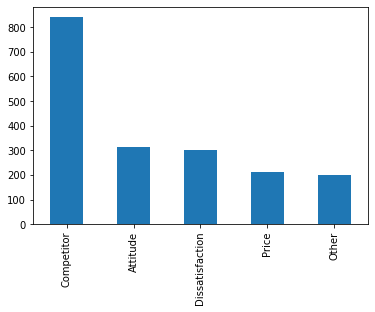

In [39]:
df['Churn Category'].value_counts().plot.bar()

#### Observing the plot, the percentage differnces between the churn label and internet service is very minimal. there is higher percentage of those who use internet service compare to non user, there is little percentage of churning compare to no churn which denote that customer may likely defect to other service provider with better price, discount and service.

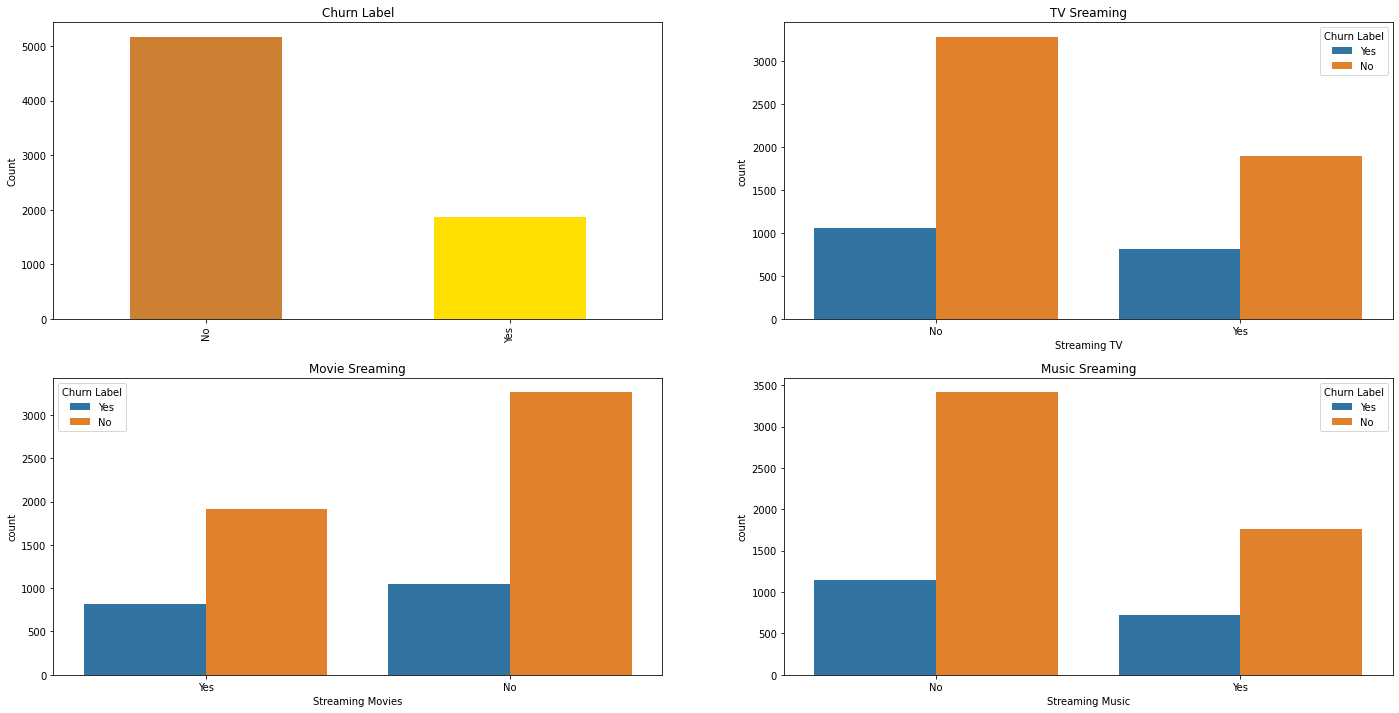

In [27]:
f,ax=plt.subplots(2,2,figsize=(24,12))
df['Churn Label'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0,0], shadow=True)
ax[0,0].set_title('Churn Label')
ax[0,0].set_ylabel('Count')
sns.countplot('Streaming TV',hue='Churn Label',data=df,ax=ax[0,1])
ax[0,1].set_title('TV Sreaming')
sns.countplot('Streaming Movies',hue='Churn Label',data=df,ax=ax[1,0])
ax[1,0].set_title('Movie Sreaming')
sns.countplot('Streaming Music',hue='Churn Label',data=df,ax=ax[1,1])
ax[1,1].set_title('Music Sreaming')
plt.show()

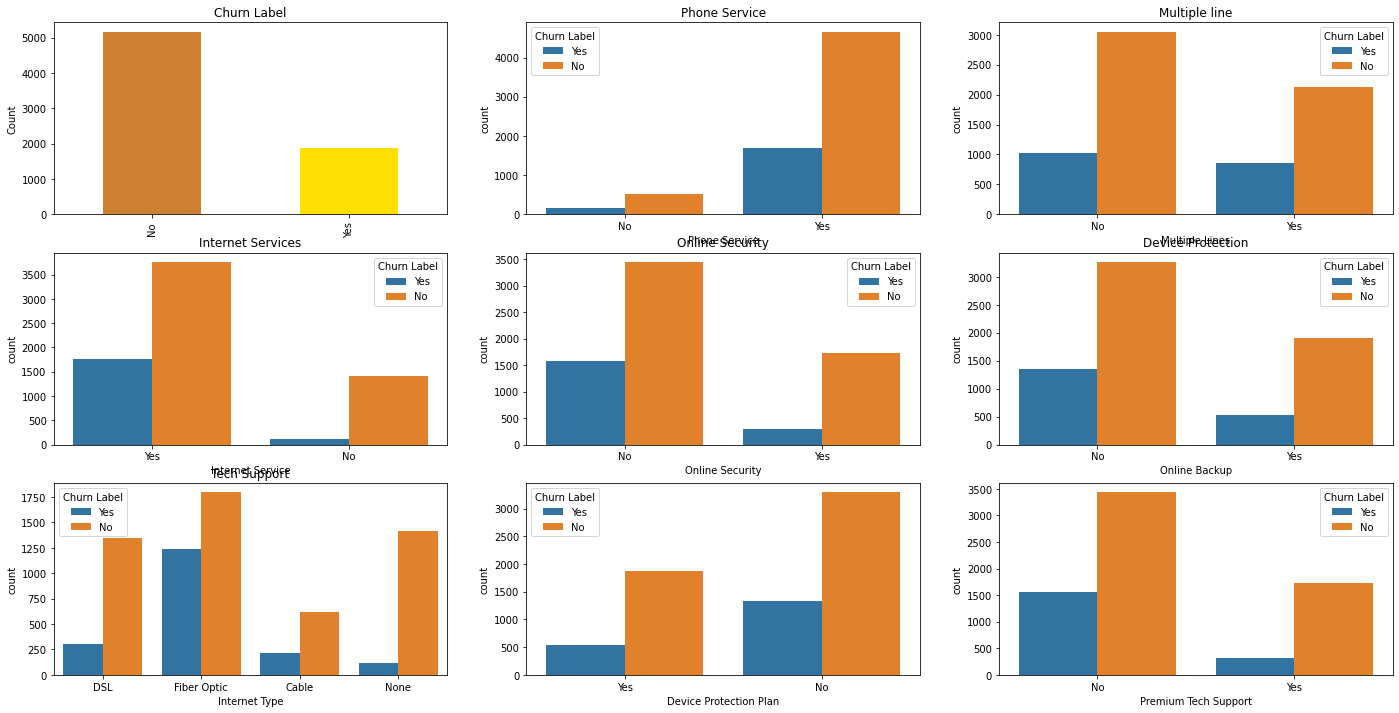

In [28]:
f,ax=plt.subplots(3,3,figsize=(24,12))
df['Churn Label'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0,0], shadow=True)
ax[0,0].set_title('Churn Label')
ax[0,0].set_ylabel('Count')
sns.countplot('Phone Service',hue='Churn Label',data=df,ax=ax[0,1])
ax[0,1].set_title('Phone Service')
sns.countplot('Multiple Lines',hue='Churn Label',data=df,ax=ax[0,2])
ax[0,2].set_title('Multiple line')
sns.countplot('Internet Service',hue='Churn Label',data=df,ax=ax[1,0])
ax[1,0].set_title('Internet Services')
sns.countplot('Online Security',hue='Churn Label',data=df,ax=ax[1,1])
ax[1,1].set_title('Online Security')
sns.countplot('Online Backup',hue='Churn Label',data=df,ax=ax[1,2])
ax[1,2].set_title('Online Backup')
sns.countplot('Internet Type',hue='Churn Label',data=df,ax=ax[2,0])
ax[2,0].set_title('Internet Type')
sns.countplot('Device Protection Plan',hue='Churn Label',data=df,ax=ax[2,1])
ax[1,2].set_title('Device Protection')
sns.countplot('Premium Tech Support',hue='Churn Label',data=df,ax=ax[2,2])
ax[2,0].set_title('Tech Support')
plt.show()

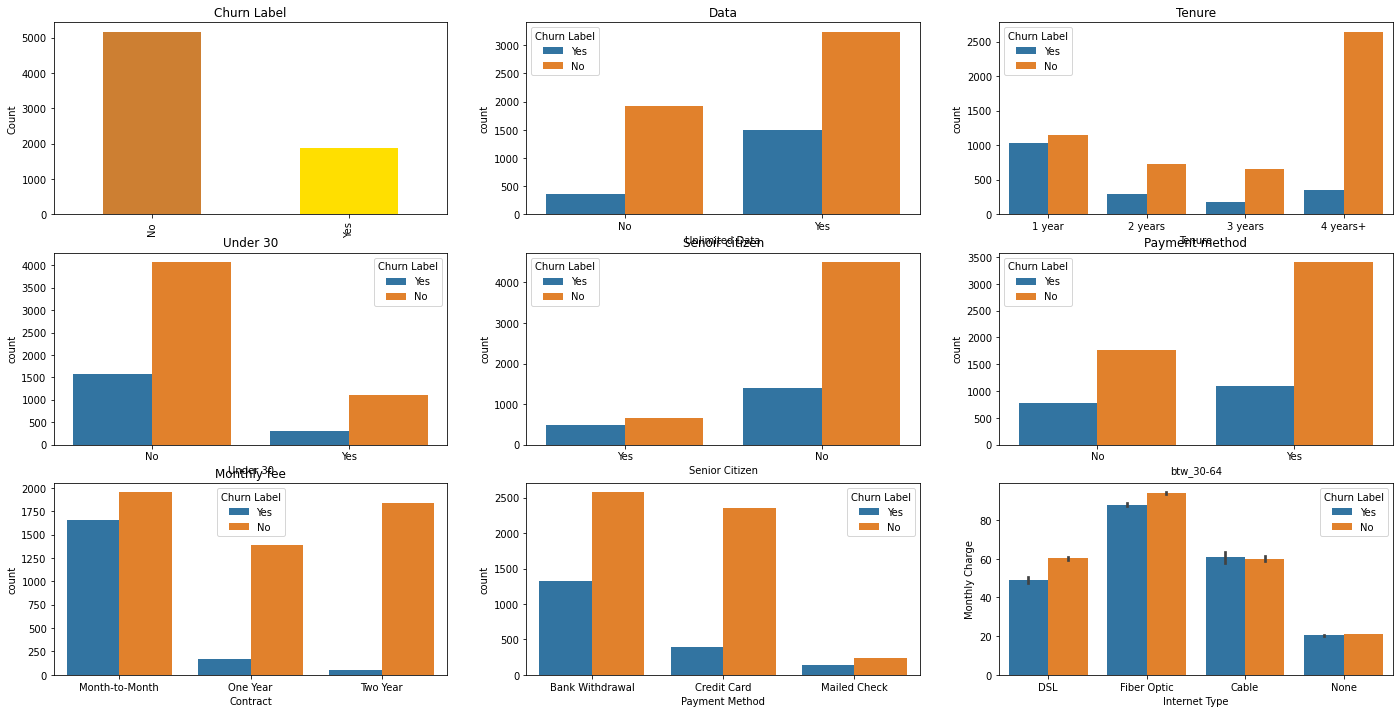

In [29]:
f,ax=plt.subplots(3,3,figsize=(24,12))
df['Churn Label'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0,0], shadow=True)
ax[0,0].set_title('Churn Label')
ax[0,0].set_ylabel('Count')
sns.countplot('Unlimited Data',hue='Churn Label',data=df,ax=ax[0,1])
ax[0,1].set_title('Data')
sns.countplot('Tenure',hue='Churn Label',data=df,ax=ax[0,2])
ax[0,2].set_title('Tenure')
sns.countplot('Under 30',hue='Churn Label',data=df,ax=ax[1,0])
ax[1,0].set_title('Under 30')
sns.countplot('Senior Citizen',hue='Churn Label',data=df,ax=ax[1,1])
ax[1,1].set_title('Senoir citizen')
sns.countplot('btw_30-64',hue='Churn Label',data=df,ax=ax[1,2])
ax[1,2].set_title('Age 30-64')
sns.countplot('Contract',hue='Churn Label',data=df,ax=ax[2,0])
ax[2,0].set_title('Contract Type')
sns.countplot('Payment Method',hue='Churn Label',data=df,ax=ax[2,1])
ax[1,2].set_title('Payment method')
sns.barplot(x='Internet Type', y='Monthly Charge',hue='Churn Label',data=df,ax=ax[2,2])
ax[2,0].set_title('Monthly fee')
plt.show()

#### printing unique values

<AxesSubplot:title={'center':'Box plot for job with success outcome'}, xlabel='Monthly Charge', ylabel='Payment Method'>

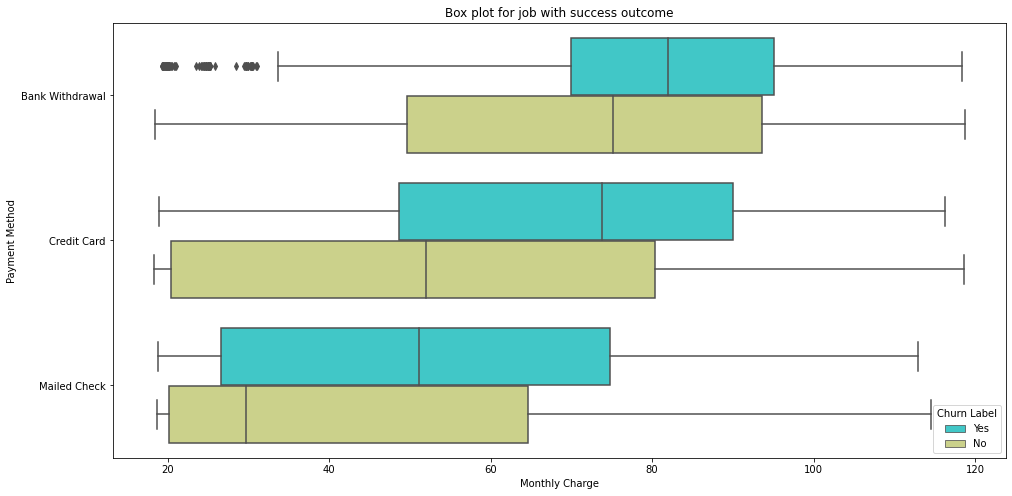

In [30]:
plt.figure(figsize=(16,8))
plt.title("Box plot for job with success outcome")
sns.boxplot(y="Payment Method", x="Monthly Charge", hue = 'Churn Label',data = df, orient="h", palette='rainbow')

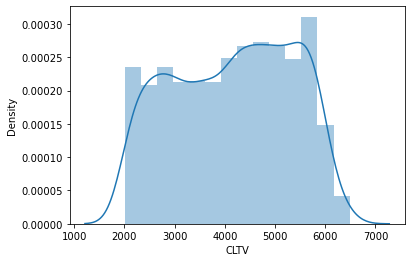

In [24]:
sns.distplot(df[df['Churn Label']== 'Yes'].CLTV)
plt.show()

In [33]:
#sns.relplot(x='age', y='balance', hue='month',data =bank[(bank.y == 'yes')])

NameError: name 'bank' is not defined

In [50]:
def summary(df):
    label=[]
    Unique_Values= []
    for col in df.columns:
        label.append(df[col].unique()[:6])
        Unique_Values.append(df[col].nunique())
    return pd.DataFrame({'Values':label,'Unique_Values':Unique_Values}, index= df.columns)
summary(df)

Values  \
Customer ID                        [8779-QRDMV, 7495-OOKFY, 1658-BYGOY, 4598-XLKN...   
Married                                                                    [No, Yes]   
Number of Referrals                                               [0, 1, 6, 2, 4, 3]   
Tenure in Months                                              [1, 8, 18, 25, 37, 27]   
Offer                              [None, Offer E, Offer D, Offer C, Offer B, Off...   
Phone Service                                                              [No, Yes]   
Avg Monthly Long Distance Charges             [0.0, 48.85, 11.33, 19.76, 6.33, 3.33]   
Multiple Lines                                                             [No, Yes]   
Internet Service                                                           [Yes, No]   
Internet Type                                        [DSL, Fiber Optic, Cable, None]   
Avg Monthly GB Download                                      [8, 17, 52, 12, 14, 18]   
Online Security                                                            [No, Yes]   
Online Backup                                                              [No, Yes]   
Device Protection Plan                                                     [Yes, No]   
Premium Tech Support                                                       [No, Yes]   
Streaming TV                                                               [No, Yes]   
Streaming Movies                                                           [Yes, No]   
Streaming Music                                                            [No, Yes]   
Unlimited Data                                                             [No, Yes]   
Contract                                        [Month-to-Month, One Year, Two Year]   
Paperless Billing                                                          [Yes, No]   
Payment Method                          [Bank Withdrawal, Credit Card, Mailed Check]   
Monthly Charge                              [39.65, 80.65, 95.45, 98.5, 76.5, 78.05]   
Total Charges                       [39.65, 633.3, 1752.55, 2514.5, 2868.15, 2135.5]   
Total Refunds                               [0.0, 45.61, 13.43, 40.95, 11.05, 29.84]   
Total Extra Data Charges                                   [20, 0, 10, 120, 140, 90]   
Total Long Distance Charges        [0.0, 390.8, 203.94, 494.00000000000006, 234.2...   
Total Revenue                      [59.65, 1024.1, 1910.88, 2995.07, 3102.36, 223...   
Satisfaction Score                                                   [3, 2, 1, 4, 5]   
Customer Status                                            [Churned, Stayed, Joined]   
Churn Label                                                                [Yes, No]   
Churn Value                                                                   [1, 0]   
CLTV                                            [5433, 5302, 3179, 5337, 2793, 4638]   
Churn Category                     [Competitor, Dissatisfaction, Price, Other, At...   
Churn Reason                       [Competitor offered more data, Competitor made...   
Tenure                                          [1 year, 2 years, 3 years, 4 years+]   
Distance call                                                              [No, Yes]   
Campaign                                                                   [No, Yes]   
age group                                   [Senioir_citizen, Young_adult, Under_30]   

                                   Unique_Values  
Customer ID                                 7043  
Married                                        2  
Number of Referrals                           12  
Tenure in Months                              72  
Offer                                          6  
Phone Service                                  2  
Avg Monthly Long Distance Charges           3584  
Multiple Lines                                 2  
Internet Service                               2  
Internet Type                                  

In [52]:
df.groupby(['Churn Value']).agg(['count', 'mean']).T

Churn Value                                        0            1
Number of Referrals               count  5174.000000  1869.000000
                                  mean      2.468690     0.521134
Tenure in Months                  count  5174.000000  1869.000000
                                  mean     37.591225    17.979133
Avg Monthly Long Distance Charges count  5174.000000  1869.000000
                                  mean     22.883572    23.167635
Avg Monthly GB Download           count  5174.000000  1869.000000
                                  mean     19.915733    22.175495
Monthly Charge                    count  5174.000000  1869.000000
                                  mean     61.265124    74.441332
Total Charges                     count  5174.000000  1869.000000
                                  mean   2550.792103  1531.796094
Total Refunds                     count  5174.000000  1869.000000
                                  mean      2.122279     1.518983
Total Extra Data Charges          count  5174.000000  1869.000000
                                  mean      6.752996     7.158909
Total Long Distance Charges       count  5174.000000  1869.000000
                                  mean    862.952107   433.917549
Total Revenue                     count  5174.000000  1869.000000
                                  mean   3418.374927  1971.353569
Satisfaction Score                count  5174.000000  1869.000000
                                  mean      3.789911     1.736223
CLTV                              count  5174.000000  1869.000000
                                  mean   4490.921337  4149.414660

In [88]:
df.groupby(['Offer']).agg(['count', 'mean'])

Count        Age            Number of Dependents            \
        count mean count       mean                count      mean   
Offer                                                                
None     3877  1.0  3877  47.063709                 3877  0.464019   
Offer A   520  1.0   520  45.442308                  520  0.588462   
Offer B   824  1.0   824  45.376214                  824  0.527913   
Offer C   415  1.0   415  48.219277                  415  0.520482   
Offer D   602  1.0   602  45.157807                  602  0.523256   
Offer E   805  1.0   805  45.821118                  805  0.285714   

        Number of Referrals           Tenure in Months             ...  \
                      count      mean            count       mean  ...   
Offer                                                              ...   
None                   3877  1.909724             3877  31.566159  ...   
Offer A                 520  3.559615              520  70.000000  ...   
Offer B                 824  2.768204              824  53.358010  ...   
Offer C                 415  1.862651              415  30.761446  ...   
Offer D                 602  1.403654              602  15.951827  ...   
Offer E                 805  0.736646              805   3.704348  ...   

        Total Revenue              Satisfaction Score           Churn Value  \
                count         mean              count      mean       count   
Offer                                                                         
None             3877  2926.847702               3877  3.237555        3877   
Offer A           520  7029.269558                520  3.546154         520   
Offer B           824  5082.423265                824  3.478155         824   
Offer C           415  2759.245470                415  3.315663         415   
Offer D           602  1315.726312                602  3.245847         602   
Offer E           805   302.424969                805  2.809938         805   

                  Churn Score             CLTV               
             mean       count       mean count         mean  
Offer                                                        
None     0.271086        3877  58.645860  3877  4361.643539  
Offer A  0.067308         520  50.882692   520  5208.678846  
Offer B  0.122573         824  54.825243   824  4839.135922  
Offer C  0.228916         415  58.197590   415  4048.038554  
Offer D  0.267442         602  58.418605   602  4025.971761  
Offer E  0.529193         805  66.740373   805  4076.595031  

[6 rows x 34 columns]

In [ ]:
plt.figure(figsize=(15, 8))

sns.heatmap(df.corr(), annot = True, cmap= 'mako', center = 0, vmin=0.1, vmax=0.8, cbar=False)

In [15]:
df= df.drop(columns=['Age', 'Number of Dependents', 'Quarter', 'Number of Referrals', 'Customer Status', 'Churn Label', 'Count','Churn Reason','Churn Category'], axis= 1)

In [17]:
df= df.drop(columns=['Gender','Customer ID','Tenure in Months' ], axis= 1)


In [ ]:
df.columns

In [123]:
numerical = [var for var in df.columns if df[var].dtype=='O']
#numerical = [var for var in df.columns if df[var].dtype!='O']
#numerical = [var for var in df.columns if df[var].nunique() == 2]

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 28 numerical variables

The numerical variables are : ['Customer ID', 'Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Quarter', 'Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Customer Status', 'Churn Label', 'Churn Category', 'Churn Reason']


In [18]:
col = ['Tenure','Payment Method', 'Contract','Internet Type', 'Offer']

In [19]:
cl= pd.DataFrame(pd.get_dummies(df[col], dummy_na=False))
cl

Tenure_1 year  Tenure_2 years  Tenure_3 years  Tenure_4 years+  \
0                 1               0               0                0   
1                 1               0               0                0   
2                 0               1               0                0   
3                 0               0               1                0   
4                 0               0               0                1   
...             ...             ...             ...              ...   
7038              0               0               0                1   
7039              0               1               0                0   
7040              0               0               0                1   
7041              1               0               0                0   
7042              0               0               0                1   

      Payment Method_Bank Withdrawal  Payment Method_Credit Card  \
0                                  1                           0   
1                                  0                           1   
2                                  1                           0   
3                                  1                           0   
4                                  1                           0   
...                              ...                         ...   
7038                               1                           0   
7039                               0                           0   
7040                               0                           1   
7041                               1                           0   
7042                               1                           0   

      Payment Method_Mailed Check  Contract_Month-to-Month  Contract_One Year  \
0                               0                        1                  0   
1                               0                        1                  0   
2                               0                        1                  0   
3                               0                        1                  0   
4                               0                        1                  0   
...                           ...                      ...                ...   
7038                            0                        0                  0   
7039                            1                        0                  1   
7040                            0                        0                  1   
7041                            0                        1                  0   
7042                            0                        0                  0   

      Contract_Two Year  Internet Type_Cable  Internet Type_DSL  \
0                     0                    0                  1   
1                     0                    0                  0   
2                     0                    0                  0   
3                     0                    0                  0   
4                     0                    0                  0   
...                 ...                  ...                ...   
7038                  1                    0                  0   
7039                  0                    1                  0   
7040                  0                    0                  0   
7041                  0                    0                  1   
7042                  1                    0                  0   

      Internet Type_Fiber Optic  Internet Type_None  Offer_None  \
0                             0                   0           1   
1                             1                   0           0   
2                             1                   0           0   
3                             1                   0           0   
4                             1                   0           0   
...                         ...                 ...         ...   
7038                          0                   1           1   
7039      

In [20]:
num_col = ['Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
        'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Churn Value', 'Churn Score',
       'CLTV']
num= pd.DataFrame(df[num_col])

In [21]:
df.head()

Under 30 Senior Citizen Married Dependents Referred a Friend    Offer  \
0       No            Yes      No         No                No     None   
1       No            Yes     Yes        Yes               Yes  Offer E   
2       No            Yes      No        Yes                No  Offer D   
3       No            Yes     Yes        Yes               Yes  Offer C   
4       No            Yes     Yes        Yes               Yes  Offer C   

  Phone Service  Avg Monthly Long Distance Charges Multiple Lines  \
0            No                               0.00             No   
1           Yes                              48.85            Yes   
2           Yes                              11.33            Yes   
3           Yes                              19.76             No   
4           Yes                               6.33            Yes   

  Internet Service  ... Total Refunds  Total Extra Data Charges  \
0              Yes  ...          0.00                        20   
1              Yes  ...          0.00                         0   
2              Yes  ...         45.61                         0   
3              Yes  ...         13.43                         0   
4              Yes  ...          0.00                         0   

  Total Long Distance Charges Total Revenue Satisfaction Score Churn Value  \
0                        0.00         59.65                  3           1   
1                      390.80       1024.10                  3           1   
2                      203.94       1910.88                  2           1   
3                      494.00       2995.07                  2           1   
4                      234.21       3102.36                  2           1   

  Churn Score  CLTV btw_30-64    Tenure  
0          91  5433        No    1 year  
1          69  5302        No    1 year  
2          81  3179        No   2 years  
3          88  5337        No   3 years  
4          67  2793        No  4 years+  

[5 rows x 35 columns]

In [22]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
onehot = OneHotEncoder()
le = LabelEncoder()
encode_col= ['Under 30', 'Senior Citizen', 'Married', 'Dependents',
       'Referred a Friend', 'Phone Service', 'Multiple Lines',
       'Internet Service','Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Paperless Billing', 'btw_30-64']
en = pd.DataFrame(df[encode_col].apply(le.fit_transform))
en

Under 30  Senior Citizen  Married  Dependents  Referred a Friend  \
0            0               1        0           0                  0   
1            0               1        1           1                  1   
2            0               1        0           1                  0   
3            0               1        1           1                  1   
4            0               1        1           1                  1   
...        ...             ...      ...         ...                ...   
7038         0               0        0           0                  0   
7039         0               0        1           1                  1   
7040         0               0        1           1                  1   
7041         0               0        1           1                  1   
7042         0               0        0           0                  0   

      Phone Service  Multiple Lines  Internet Service  Online Security  \
0                 0               0                 1                0   
1                 1               1                 1                0   
2                 1               1                 1                0   
3                 1               0                 1                0   
4                 1               1                 1                0   
...             ...             ...               ...              ...   
7038              1               0                 0                0   
7039              1               1                 1                1   
7040              1               1                 1                0   
7041              0               0                 1                1   
7042              1               0                 1                1   

      Online Backup  Device Protection Plan  Premium Tech Support  \
0                 0                       1                     0   
1                 1                       0                     0   
2                 0                       0                     0   
3                 1                       1                     0   
4                 0                       0                     0   
...             ...                     ...                   ...   
7038              0                       0                     0   
7039              0                       1                     1   
7040              1                       1                     0   
7041              0                       0                     0   
7042              0                       1                     1   

      Streaming TV  Streaming Movies  Streaming Music  Unlimited Data  \
0                0                 1                0               0   
1                0                 0                0               1   
2                1                 1                1               1   
3                1                 1                0               1   
4                0                 0                0               1   
...            ...               ...              ...             ...   
7038             0                 0                0               0   
7039             1                 1                1               1   
7040             1                 1                1               1   
7041             0                 0                0               1   
7042             1                 1                1               1   

      Paperless Billing  btw_30-64  
0                     1          0  
1                     1          0  
2                     1          0  
3                     1          0  
4                     1          0  
...                 ...        ...  
7038                  1          1  
7039                  1          1  
7040                  1          1  
7041                  1          1  
7042                  1          1  

[7043 rows x 18 columns]

In [23]:
df2= en.join(cl)
df2

Under 30  Senior Citizen  Married  Dependents  Referred a Friend  \
0            0               1        0           0                  0   
1            0               1        1           1                  1   
2            0               1        0           1                  0   
3            0               1        1           1                  1   
4            0               1        1           1                  1   
...        ...             ...      ...         ...                ...   
7038         0               0        0           0                  0   
7039         0               0        1           1                  1   
7040         0               0        1           1                  1   
7041         0               0        1           1                  1   
7042         0               0        0           0                  0   

      Phone Service  Multiple Lines  Internet Service  Online Security  \
0                 0               0                 1                0   
1                 1               1                 1                0   
2                 1               1                 1                0   
3                 1               0                 1                0   
4                 1               1                 1                0   
...             ...             ...               ...              ...   
7038              1               0                 0                0   
7039              1               1                 1                1   
7040              1               1                 1                0   
7041              0               0                 1                1   
7042              1               0                 1                1   

      Online Backup  ...  Internet Type_Cable  Internet Type_DSL  \
0                 0  ...                    0                  1   
1                 1  ...                    0                  0   
2                 0  ...                    0                  0   
3                 1  ...                    0                  0   
4                 0  ...                    0                  0   
...             ...  ...                  ...                ...   
7038              0  ...                    0                  0   
7039              0  ...                    1                  0   
7040              1  ...                    0                  0   
7041              0  ...                    0                  1   
7042              0  ...                    0                  0   

      Internet Type_Fiber Optic  Internet Type_None  Offer_None  \
0                             0                   0           1   
1                             1                   0           0   
2                             1                   0           0   
3                             1                   0           0   
4                             1                   0           0   
...                         ...                 ...         ...   
7038                          0                   1           1   
7039                          0                   0           0   
7040                          1                   0           1   
7041                          0                   0           1   
7042                          1                   0           1   

      Offer_Offer A  Offer_Offer B  Offer_Offer C  Offer_Offer D  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 0              0              0              1   
3                 0              0              1              0   
4                 0              0              1              0   
...             ...            ...            ...            ...   
7038              0              0              0              0   
7039              0              0              1             

In [24]:
df_new = df2.join(num)

In [25]:
df_new

Under 30  Senior Citizen  Married  Dependents  Referred a Friend  \
0            0               1        0           0                  0   
1            0               1        1           1                  1   
2            0               1        0           1                  0   
3            0               1        1           1                  1   
4            0               1        1           1                  1   
...        ...             ...      ...         ...                ...   
7038         0               0        0           0                  0   
7039         0               0        1           1                  1   
7040         0               0        1           1                  1   
7041         0               0        1           1                  1   
7042         0               0        0           0                  0   

      Phone Service  Multiple Lines  Internet Service  Online Security  \
0                 0               0                 1                0   
1                 1               1                 1                0   
2                 1               1                 1                0   
3                 1               0                 1                0   
4                 1               1                 1                0   
...             ...             ...               ...              ...   
7038              1               0                 0                0   
7039              1               1                 1                1   
7040              1               1                 1                0   
7041              0               0                 1                1   
7042              1               0                 1                1   

      Online Backup  ...  Monthly Charge  Total Charges  Total Refunds  \
0                 0  ...           39.65          39.65           0.00   
1                 1  ...           80.65         633.30           0.00   
2                 0  ...           95.45        1752.55          45.61   
3                 1  ...           98.50        2514.50          13.43   
4                 0  ...           76.50        2868.15           0.00   
...             ...  ...             ...            ...            ...   
7038              0  ...           21.15        1419.40          19.31   
7039              0  ...           84.80        1990.50          48.23   
7040              1  ...          103.20        7362.90          45.38   
7041              0  ...           29.60         346.45          27.24   
7042              0  ...          105.65        6844.50           0.00   

      Total Extra Data Charges  Total Long Distance Charges  Total Revenue  \
0                           20                         0.00          59.65   
1                            0                       390.80        1024.10   
2                            0                       203.94        1910.88   
3                            0                       494.00        2995.07   
4                            0                       234.21        3102.36   
...                        ...                          ...            ...   
7038                         0                      1639.44        3039.53   
7039                         0                       865.20        2807.47   
7040                         0                      2135.52        9453.04   
7041                         0                         0.00         319.21   
7042                         0                      2043.36        8887.86   

      Satisfaction Score  Churn Value  Churn Score  CLTV  
0                      3            1           91  5433  
1                      3            1           69  5302  
2                      2            1           81  3179  
3                      2            1           88  5337  
4                      2            1           67  2793  
...                  ...          ...          .

In [26]:
df_new.describe()

Under 30  Senior Citizen      Married   Dependents  \
count  7043.000000     7043.000000  7043.000000  7043.000000   
mean      0.198921        0.162147     0.483033     0.231010   
std       0.399217        0.368612     0.499748     0.421508   
min       0.000000        0.000000     0.000000     0.000000   
25%       0.000000        0.000000     0.000000     0.000000   
50%       0.000000        0.000000     0.000000     0.000000   
75%       0.000000        0.000000     1.000000     0.000000   
max       1.000000        1.000000     1.000000     1.000000   

       Referred a Friend  Phone Service  Multiple Lines  Internet Service  \
count        7043.000000    7043.000000     7043.000000       7043.000000   
mean            0.457476       0.903166        0.421837          0.783331   
std             0.498224       0.295752        0.493888          0.412004   
min             0.000000       0.000000        0.000000          0.000000   
25%             0.000000       1.000000        0.000000          1.000000   
50%             0.000000       1.000000        0.000000          1.000000   
75%             1.000000       1.000000        1.000000          1.000000   
max             1.000000       1.000000        1.000000          1.000000   

       Online Security  Online Backup  ...  Monthly Charge  Total Charges  \
count      7043.000000    7043.000000  ...     7043.000000    7043.000000   
mean          0.286668       0.344881  ...       64.761692    2280.381264   
std           0.452237       0.475363  ...       30.090047    2266.220462   
min           0.000000       0.000000  ...       18.250000      18.800000   
25%           0.000000       0.000000  ...       35.500000     400.150000   
50%           0.000000       0.000000  ...       70.350000    1394.550000   
75%           1.000000       1.000000  ...       89.850000    3786.600000   
max           1.000000       1.000000  ...      118.750000    8684.800000   

       Total Refunds  Total Extra Data Charges  Total Long Distance Charges  \
count    7043.000000               7043.000000                  7043.000000   
mean        1.962182                  6.860713                   749.099262   
std         7.902614                 25.104978                   846.660055   
min         0.000000                  0.000000                     0.000000   
25%         0.000000                  0.000000                    70.545000   
50%         0.000000                  0.000000                   401.440000   
75%         0.000000                  0.000000                  1191.100000   
max        49.790000                150.000000                  3564.720000   

       Total Revenue  Satisfaction Score  Churn Value  Churn Score  \
count    7043.000000         7043.000000  7043.000000  7043.000000   
mean     3034.379056            3.244924     0.265370    58.505040   
std      2865.204542            1.201657     0.441561    21.170031   
min        21.360000            1.000000     0.000000     5.000000   
25%       605.610000            3.000000     0.000000    40.000000   
50%      2108.640000            3.000000     0.000000    61.000000   
75%      4801.145000            4.000000     1.000000    75.500000   
max     11979.340000            5.000000     1.000000    96.000000   

              CLTV  
count  7043.000000  
mean   4400.295755  
std    1183.057152  
min    2003.000000  
25%    3469.000000  
50%    4527.000000  
75%    5380.500000  
max    6500.000000  

[8 rows x 50 columns]

In [100]:
onehot = OneHotEncoder()
n = (df_new['Satisfaction Score'])
n

TypeError: 'OneHotEncoder' object is not callable

In [59]:
model_df.columns

Index(['Customer ID', 'Married', 'Number of Referrals', 'Tenure in Months',
       'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charge',
       'Total Charges', 'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score',
       'Customer Status', 'Churn Label', 'Churn Value', 'CLTV',
       'Churn Category', 'Churn Reason', 'Tenure', 'Distance call', 'Campaign',
       'age group'],
      dtype='object')

In [45]:
df_new.isna().sum()

Under 30                             0
Senior Citizen                       0
Married                              0
Dependents                           0
Referred a Friend                    0
Phone Service                        0
Multiple Lines                       0
Internet Service                     0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Paperless Billing                    0
btw_30-64                            0
Tenure_1 year                        0
Tenure_2 years                       0
Tenure_3 years                       0
Tenure_4 years+                      0
Payment Method_Bank Withdrawal       0
Payment Method_Credit Card           0
Payment Method_Mailed Check          0
Contract_Month-to-Month  

<AxesSubplot:>

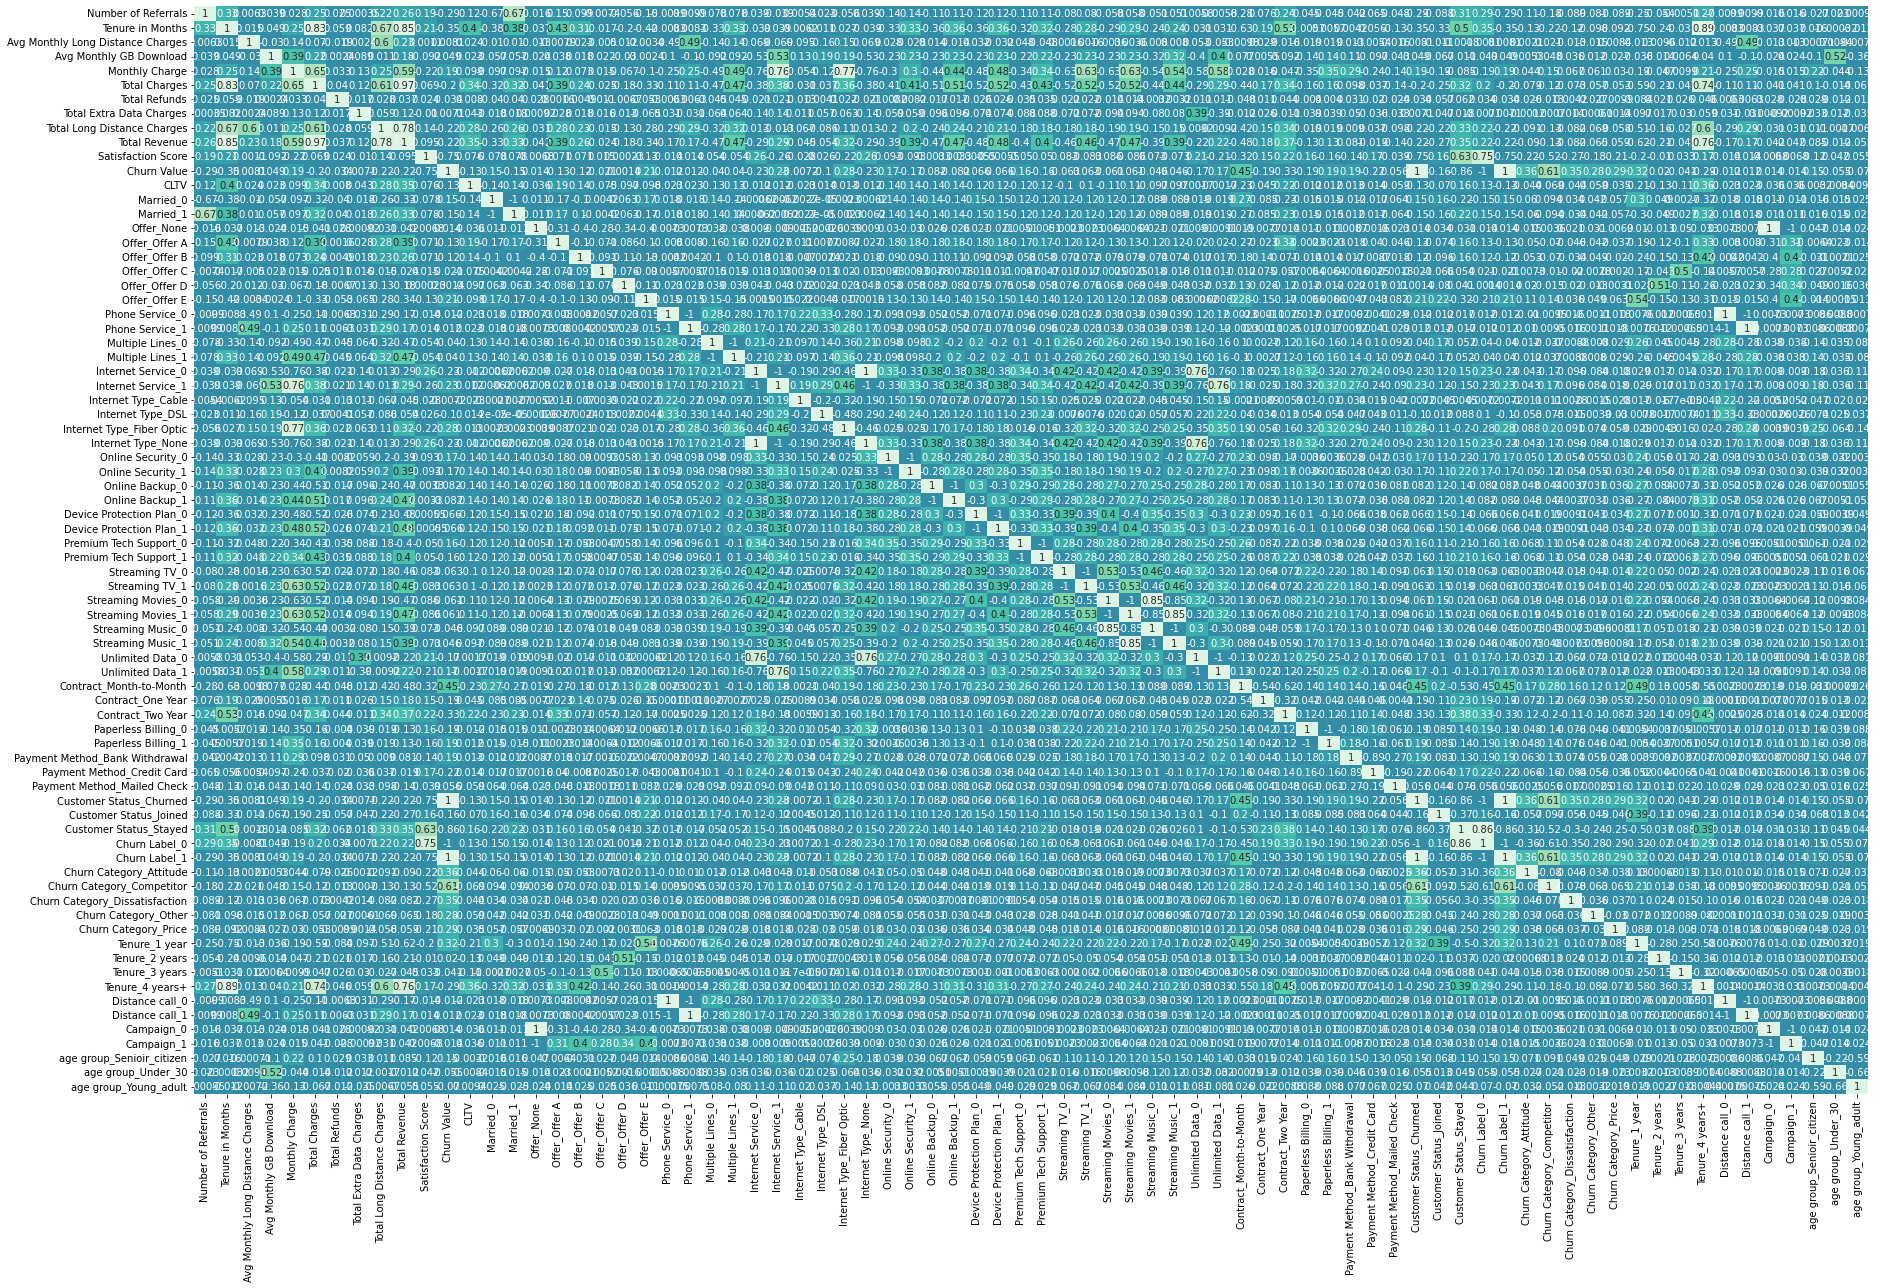

In [57]:
plt.figure(figsize=(30, 20))

sns.heatmap(model_df.corr(), annot = True, cmap= 'mako', center = 0, vmin=0.1, vmax=0.8, cbar=False)

In [69]:
df_new= df.drop(columns= ['Churn Label', 'Customer Status', 'CLTV',
       'Churn Category', 'Churn Reason','Offer', 'Customer ID', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Satisfaction Score','Total Charges'])

In [70]:
X = df_new.drop(columns= ['Churn Value']).copy()
Y= df_new['Churn Value']

In [71]:
def final():
                
                encode_features = [feature for feature  in X.columns if X[feature ].dtype=='O' and X[feature].nunique() == 2]
                dumy_features = [feature for feature  in X.columns if X[feature ].dtype=='O' and X[feature].nunique() >2]
                le = LabelEncoder()
                X[encode_features]=X[encode_features].apply(le.fit_transform)
                #pd.get_dummies(X['Satisfaction Score'])
                df_data = pd.get_dummies(X, columns=dumy_features, dummy_na=False)
                final_df= df_data
                return final_df
X = final()
X.columns

Index(['Married', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Paperless Billing',
       'Monthly Charge', 'Total Revenue', 'Distance call', 'Campaign',
       'Internet Type_Cable', 'Internet Type_DSL', 'Internet Type_Fiber Optic',
       'Internet Type_None', 'Contract_Month-to-Month', 'Contract_One Year',
       'Contract_Two Year', 'Payment Method_Bank Withdrawal',
       'Payment Method_Credit Card', 'Payment Method_Mailed Check',
       'Tenure_1 year', 'Tenure_2 years', 'Tenure_3 years', 'Tenure_4 years+',
       'age group_Senioir_citizen', 'age group_Under_30',
       'age group_Young_adult'],
      dtype='object')

In [74]:
X_new = SelectKBest(chi2,k=10)
g= X_new.fit_transform(X,Y)
filter = X_new.get_support()

features = X.columns
print(features[filter])

Index(['Monthly Charge', 'Total Revenue', 'Internet Type_Fiber Optic',
       'Internet Type_None', 'Contract_Month-to-Month', 'Contract_One Year',
       'Contract_Two Year', 'Payment Method_Credit Card', 'Tenure_1 year',
       'Tenure_4 years+'],
      dtype='object')


In [73]:
from sklearn.feature_selection import SelectKBest, chi2
X_new = SelectKBest(chi2,k=10).fit(X,Y)


In [74]:
dfscores = pd.DataFrame(X_new.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [75]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['features','Score']  #naming the dataframe columns
featureScores.sort_values(by='Score', ascending = False)

Specs          Score
14                   Total Revenue  947453.900111
13                  Monthly Charge    3680.787699
15              Satisfaction Score    1784.607244
28         Contract_Month-to-Month     690.329459
30               Contract_Two Year     555.793039
34                   Tenure_1 year     489.862946
37                 Tenure_4 years+     328.477161
26       Internet Type_Fiber Optic     313.381917
23                   Offer_Offer E     287.408609
27              Internet Type_None     286.520193
32      Payment Method_Credit Card     205.057957
29               Contract_One Year     199.170745
4                  Online Security     147.295858
7             Premium Tech Support     135.559783
38       age group_Senioir_citizen     134.351545
31  Payment Method_Bank Withdrawal     111.633630
12               Paperless Billing     105.680863
19                   Offer_Offer A     104.637197
20                   Offer_Offer B      86.187715
0                          Married      82.412083
3                 Internet Service      79.251371
11                  Unlimited Data      63.740022
25               Internet Type_DSL      53.604472
5                    Online Backup      31.217694
33     Payment Method_Mailed Check      21.139574
6           Device Protection Plan      20.226662
8                     Streaming TV      17.334235
39              age group_Under_30      16.822305
9                 Streaming Movies      16.242531
40           age group_Young_adult      12.606798
36                  Tenure_3 years      10.256884
10                 Streaming Music       9.466142
2                   Multiple Lines       6.548512
21                   Offer_Offer C       2.828936
35                  Tenure_2 years       2.482441
17                        Campaign       0.795697
18                      Offer_None       0.649775
24             Internet Type_Cable       0.325473
16                   Distance call       0.097261
1                    Phone Service       0.097261
22                   Offer_Offer D       0.013257

In [76]:
print(featureScores.nlargest(10,'Score'))

                        Specs          Score
14              Total Revenue  947453.900111
13             Monthly Charge    3680.787699
15         Satisfaction Score    1784.607244
28    Contract_Month-to-Month     690.329459
30          Contract_Two Year     555.793039
34              Tenure_1 year     489.862946
37            Tenure_4 years+     328.477161
26  Internet Type_Fiber Optic     313.381917
23              Offer_Offer E     287.408609
27         Internet Type_None     286.520193


In [53]:
# X = df_new.drop(columns= ['Churn Value', 'Under 30', 'Senior Citizen', 'Married', 
#        'Referred a Friend', 'Phone Service', 'Multiple Lines',
#        'Internet Service',  'Online Backup',
#        'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
#        'Streaming Movies', 'Streaming Music', 'Unlimited Data',
#        'Paperless Billing', 'btw_30-64',  'Tenure_2 years',
#        'Tenure_3 years',  'Tenure_nan',
#        'Payment Method_Bank Withdrawal', 
#        'Payment Method_Mailed Check', 'Payment Method_nan', 
#        'Contract_nan', 'Internet Type_Cable', 'Internet Type_DSL',
#          'Internet Type_nan',
#        'Offer_None', 'Offer_Offer A', 'Offer_Offer B', 'Offer_Offer C',
#        'Offer_Offer D',  'Offer_nan',
#        'Avg Monthly Long Distance Charges',
#        'Total Extra Data Charges']).copy()
# Y= df_new['Churn Value']

In [75]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, RepeatedStratifiedKFold, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import recall_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, f1_score, accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTETomek
from collections import Counter


In [114]:
X_train, X_rem, Y_train, Y_rem = train_test_split(X,Y, train_size = 0.7)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_rem, Y_rem, test_size=0.5)

print(X_train.shape), print(Y_train.shape)
print(X_valid.shape), print(Y_valid.shape)
print(X_test.shape), print(Y_test.shape)
X_train.head()

(4930, 34)
(4930,)
(1056, 34)
(1056,)
(1057, 34)
(1057,)


Married  Phone Service  Multiple Lines  Internet Service  \
4230        0              1               0                 1   
2135        0              1               0                 0   
2505        0              1               1                 1   
4120        0              1               0                 1   
5761        1              0               0                 1   

      Online Security  Online Backup  Device Protection Plan  \
4230                0              1                       1   
2135                0              0                       0   
2505                0              0                       0   
4120                1              1                       1   
5761                0              1                       0   

      Premium Tech Support  Streaming TV  Streaming Movies  ...  \
4230                     1             0                 1  ...   
2135                     0             0                 0  ...   
2505                     0             0                 0  ...   
4120                     1             0                 1  ...   
5761                     1             0                 0  ...   

      Payment Method_Bank Withdrawal  Payment Method_Credit Card  \
4230                               1                           0   
2135                               1                           0   
2505                               0                           1   
4120                               0                           1   
5761                               0                           1   

      Payment Method_Mailed Check  Tenure_1 year  Tenure_2 years  \
4230                            0              0               1   
2135                            0              1               0   
2505                            0              1               0   
4120                            0              0               0   
5761                            0              0               0   

      Tenure_3 years  Tenure_4 years+  age group_Senioir_citizen  \
4230               0                0                          0   
2135               0                0                          0   
2505               0                0                          0   
4120               0                1                          0   
5761               0                1                          0   

      age group_Under_30  age group_Young_adult  
4230                   0                      1  
2135                   0                      1  
2505                   1                      0  
4120                   0                      1  
5761                   0                      1  

[5 rows x 34 columns]

In [111]:
#scaler=StandardScaler()
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
print(Counter(Y_train))

Counter({0: 3638, 1: 1292})


In [101]:
# sm= SMOTE(random_state=1)
# X_train, Y_train = sm.fit_resample(X_train, Y_train)
# print(Y_train.shape)
# print(X_train.shape)
# print(Counter(Y_train))

LR accuracy: 0.8418560606060606
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       785
           1       0.73      0.60      0.66       271

    accuracy                           0.84      1056
   macro avg       0.80      0.76      0.78      1056
weighted avg       0.84      0.84      0.84      1056



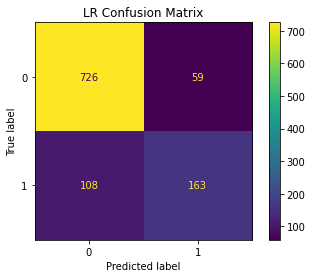

In [102]:
lr_model= LogisticRegression()
lr_model.fit(X_train, Y_train)
predict2= lr_model.predict(X_valid)
lr_accuracy = lr_model.score(X_valid,Y_valid)
print("LR accuracy:", lr_accuracy )
lrp = precision_score(Y_valid,predict2)
lrr = recall_score(Y_valid,predict2)
lrf1 = f1_score(Y_valid,predict2)

lrmatrix= confusion_matrix(Y_valid, predict2)
lrplt = ConfusionMatrixDisplay(lrmatrix)
lrplt.plot()
plt.title("LR Confusion Matrix")
plt.show
print(classification_report(Y_valid, predict2 ))

In [24]:
auc_score = roc_auc_score(Y_valid, predict2)
print('Log_reg auc_score:', auc_score)

Log_reg auc_score: 0.9339361678433818


<function matplotlib.pyplot.show(close=None, block=None)>

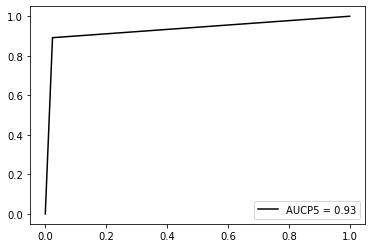

In [25]:
fpr1, tpr1, threshold = roc_curve(Y_valid, predict2) 
plt.plot(fpr1, tpr1, color = 'black', label= 'AUCP5 = %0.2f' % auc_score)
plt.legend(loc = 'lower right')

plt.show

In [26]:
logit2_coef = pd.DataFrame({
    'feature': list(X.columns),
    'coefficient': [i for i in lr_model.coef_[0]]
}).sort_values('coefficient', ascending=False)
logit2_coef

feature  coefficient
13                  Monthly Charge     1.111348
22         Contract_Month-to-Month     0.885422
28                   Tenure_1 year     0.637875
32       age group_Senioir_citizen     0.577910
10                 Streaming Music     0.510530
27     Payment Method_Mailed Check     0.420972
12               Paperless Billing     0.355458
3                 Internet Service     0.312689
8                     Streaming TV     0.231699
20       Internet Type_Fiber Optic     0.231042
6           Device Protection Plan     0.201978
17                        Campaign     0.171620
2                   Multiple Lines     0.149046
18             Internet Type_Cable     0.141898
23               Contract_One Year     0.052730
25  Payment Method_Bank Withdrawal    -0.018894
14                   Total Revenue    -0.050418
19               Internet Type_DSL    -0.060252
34           age group_Young_adult    -0.171069
31                 Tenure_4 years+    -0.178383
29                  Tenure_2 years    -0.211521
1                    Phone Service    -0.213917
16                   Distance call    -0.213917
30                  Tenure_3 years    -0.247038
0                          Married    -0.265788
5                    Online Backup    -0.288123
21              Internet Type_None    -0.311755
9                 Streaming Movies    -0.328017
11                  Unlimited Data    -0.329637
26      Payment Method_Credit Card    -0.401145
33              age group_Under_30    -0.405907
7             Premium Tech Support    -0.540845
24               Contract_Two Year    -0.937219
4                  Online Security    -2.065484
15              Satisfaction Score   -13.086927

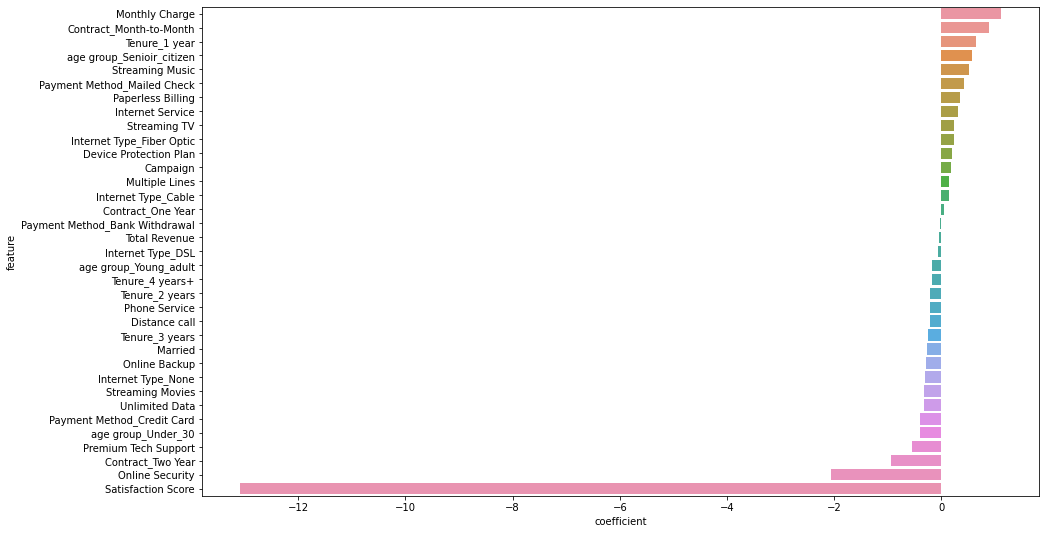

In [32]:
f, ax = plt.subplots(figsize=(15,9))
ax=sns.barplot(x='coefficient', y='feature', data= logit2_coef)
plt.show()

Best accuracy: 0.980730 using {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       803
           1       0.97      0.96      0.97       253

    accuracy                           0.98      1056
   macro avg       0.98      0.98      0.98      1056
weighted avg       0.98      0.98      0.98      1056



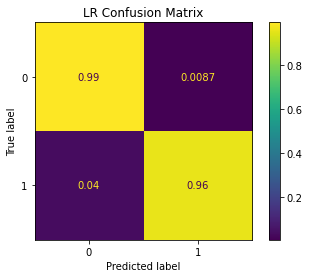

In [87]:
lr_model= LogisticRegression()
param_grid = {
            'penalty' : ['l1','l2'], 
            'C'       : np.logspace(-3,3,7),
            'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
            }

grid_search_log = GridSearchCV(lr_model, param_grid=param_grid, scoring = 'accuracy')
grid_result = grid_search_log.fit(X_train, Y_train)
predict2= grid_search_log.predict(X_valid)
lr_accuracy_tuned = accuracy_score(Y_valid, predict2)
lrp_tuned = precision_score(Y_valid,predict2)
lrr_tuned = recall_score(Y_valid,predict2)
lrf1_tuned = f1_score(Y_valid,predict2)
# summarize results
print("Best accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

lrmatrix= confusion_matrix(Y_valid, predict2, normalize= 'true')
lrplt = ConfusionMatrixDisplay(lrmatrix)
lrplt.plot()
plt.title("LR Confusion Matrix")
plt.show
print(classification_report(Y_valid, predict2 ))

In [49]:
dash_valid = X_valid.copy()
dash_valid.head()

Married  Phone Service  Multiple Lines  Internet Service  \
5250        1              1               1                 1   
2609        0              1               0                 1   
4968        0              1               0                 0   
1499        0              1               1                 1   
3972        0              1               0                 1   

      Online Security  Online Backup  Device Protection Plan  \
5250                0              1                       1   
2609                0              1                       1   
4968                0              0                       0   
1499                1              0                       0   
3972                0              0                       0   

      Premium Tech Support  Streaming TV  Streaming Movies  ...  \
5250                     1             1                 1  ...   
2609                     0             1                 0  ...   
4968                     0             0                 0  ...   
1499                     0             1                 1  ...   
3972                     1             1                 1  ...   

      Payment Method_Bank Withdrawal  Payment Method_Credit Card  \
5250                               1                           0   
2609                               1                           0   
4968                               0                           1   
1499                               1                           0   
3972                               1                           0   

      Payment Method_Mailed Check  Tenure_1 year  Tenure_2 years  \
5250                            0              0               0   
2609                            0              0               0   
4968                            0              0               0   
1499                            0              1               0   
3972                            0              1               0   

      Tenure_3 years  Tenure_4 years+  age group_Senioir_citizen  \
5250               0                1                          0   
2609               0                1                          0   
4968               1                0                          0   
1499               0                0                          0   
3972               0                0                          0   

      age group_Under_30  age group_Young_adult  
5250                   1                      0  
2609                   0                      1  
4968                   0                      1  
1499                   0                      1  
3972                   0                      1  

[5 rows x 35 columns]

In [48]:
from sklearn.metrics import r2_score, mean_squared_error
print("R2 score: ",r2_score(Y_valid,predict2)*100)
print("RMSE: ",np.sqrt(mean_squared_error(Y_valid,predict2)))

#Error
error_diff = pd.DataFrame({'Actual Values': np.array(Y_valid).flatten(), 'Predicted Values': predict2.flatten()})
error_diff.head(10)


R2 score:  -102.94591339104859
RMSE:  0.6351449369310055


Actual Values  Predicted Values
0              0                 0
1              0                 1
2              0                 0
3              1                 0
4              0                 0
5              1                 0
6              0                 0
7              1                 0
8              0                 0
9              0                 1

In [96]:
dash_valid= pd.concat([dash_valid,error_diff], axis =1)

In [97]:
#dash_valid.drop(columns=['Actual', 'Predict'])
dash_valid.head(10)

Married  Phone Service  Multiple Lines  Internet Service  Online Security  \
0      NaN            NaN             NaN               NaN              NaN   
1      NaN            NaN             NaN               NaN              NaN   
2      NaN            NaN             NaN               NaN              NaN   
3      NaN            NaN             NaN               NaN              NaN   
4      NaN            NaN             NaN               NaN              NaN   
5      NaN            NaN             NaN               NaN              NaN   
6      NaN            NaN             NaN               NaN              NaN   
7      NaN            NaN             NaN               NaN              NaN   
8      NaN            NaN             NaN               NaN              NaN   
9      NaN            NaN             NaN               NaN              NaN   

   Online Backup  Device Protection Plan  Premium Tech Support  Streaming TV  \
0            NaN                     NaN                   NaN           NaN   
1            NaN                     NaN                   NaN           NaN   
2            NaN                     NaN                   NaN           NaN   
3            NaN                     NaN                   NaN           NaN   
4            NaN                     NaN                   NaN           NaN   
5            NaN                     NaN                   NaN           NaN   
6            NaN                     NaN                   NaN           NaN   
7            NaN                     NaN                   NaN           NaN   
8            NaN                     NaN                   NaN           NaN   
9            NaN                     NaN                   NaN           NaN   

   Streaming Movies  ...  Payment Method_Mailed Check  Tenure_1 year  \
0               NaN  ...                          NaN            NaN   
1               NaN  ...                          NaN            NaN   
2               NaN  ...                          NaN            NaN   
3               NaN  ...                          NaN            NaN   
4               NaN  ...                          NaN            NaN   
5               NaN  ...                          NaN            NaN   
6               NaN  ...                          NaN            NaN   
7               NaN  ...                          NaN            NaN   
8               NaN  ...                          NaN            NaN   
9               NaN  ...                          NaN            NaN   

   Tenure_2 years  Tenure_3 years  Tenure_4 years+  age group_Senioir_citizen  \
0             NaN             NaN              NaN                        NaN   
1             NaN             NaN              NaN                        NaN   
2             NaN             NaN              NaN                        NaN   
3             NaN             NaN              NaN                        NaN   
4             NaN             NaN              NaN                        NaN   
5             NaN             NaN              NaN                        NaN   
6             NaN             NaN              NaN                        NaN   
7             NaN             NaN              NaN                        NaN   
8             NaN             NaN              NaN                        NaN   
9             NaN             NaN              NaN                        NaN   

   age group_Under_30  age group_Young_adult  Actual Values  Predicted Values  
0                 NaN                    NaN            0.0               0.0  
1                 NaN                    NaN            0.0               1.0  
2                 NaN                    NaN            0.0               0.0  
3                 NaN                    NaN            1.0               0.0  
4                 NaN                    NaN            0.0               0.0  
5                 NaN                    NaN            1.0               0.

RF accuracy: 0.8200757575757576
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       775
           1       0.67      0.65      0.66       281

    accuracy                           0.82      1056
   macro avg       0.77      0.77      0.77      1056
weighted avg       0.82      0.82      0.82      1056



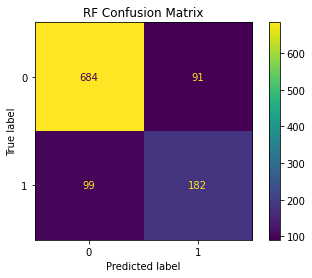

In [93]:
RF_model= RandomForestClassifier()
RF_model.fit(X_train, Y_train)
predict7= RF_model.predict(X_valid)
RF_accuracy = RF_model.score(X_valid,Y_valid)
print("RF accuracy:", RF_accuracy )
rfp = precision_score(Y_valid,predict7)
rfr = recall_score(Y_valid,predict7)
rff1 = f1_score(Y_valid,predict7)

RFmatrix= confusion_matrix(Y_valid, predict7)
RFplt = ConfusionMatrixDisplay(RFmatrix)
RFplt.plot()
plt.title("RF Confusion Matrix")
plt.show
print(classification_report(Y_valid, predict7 ))

In [106]:
xcols = X_train.columns

In [107]:
X_train = pd.DataFrame(X_train, columns = [xcols])
feature_score = pd.Series(RF_model.feature_importances_, index = X_train.columns).sort_values(ascending=False)
feature_score

Total Revenue                     0.128925
Monthly Charge                    0.119542
Contract_Month-to-Month           0.109108
Contract_Two Year                 0.058165
Tenure_1 year                     0.045785
Paperless Billing                 0.035423
Internet Type_Fiber Optic         0.034005
Premium Tech Support              0.032855
Online Security                   0.031534
Campaign                          0.029946
Tenure_4 years+                   0.028017
Married                           0.025530
Online Backup                     0.024200
Contract_One Year                 0.024083
Payment Method_Credit Card        0.023359
Multiple Lines                    0.021951
Unlimited Data                    0.020250
Payment Method_Bank Withdrawal    0.020167
Device Protection Plan            0.019310
Streaming TV                      0.019215
age group_Senioir_citizen         0.016837
age group_Young_adult             0.016050
Streaming Movies                  0.014429
age group_U

NotImplementedError: isna is not defined for MultiIndex

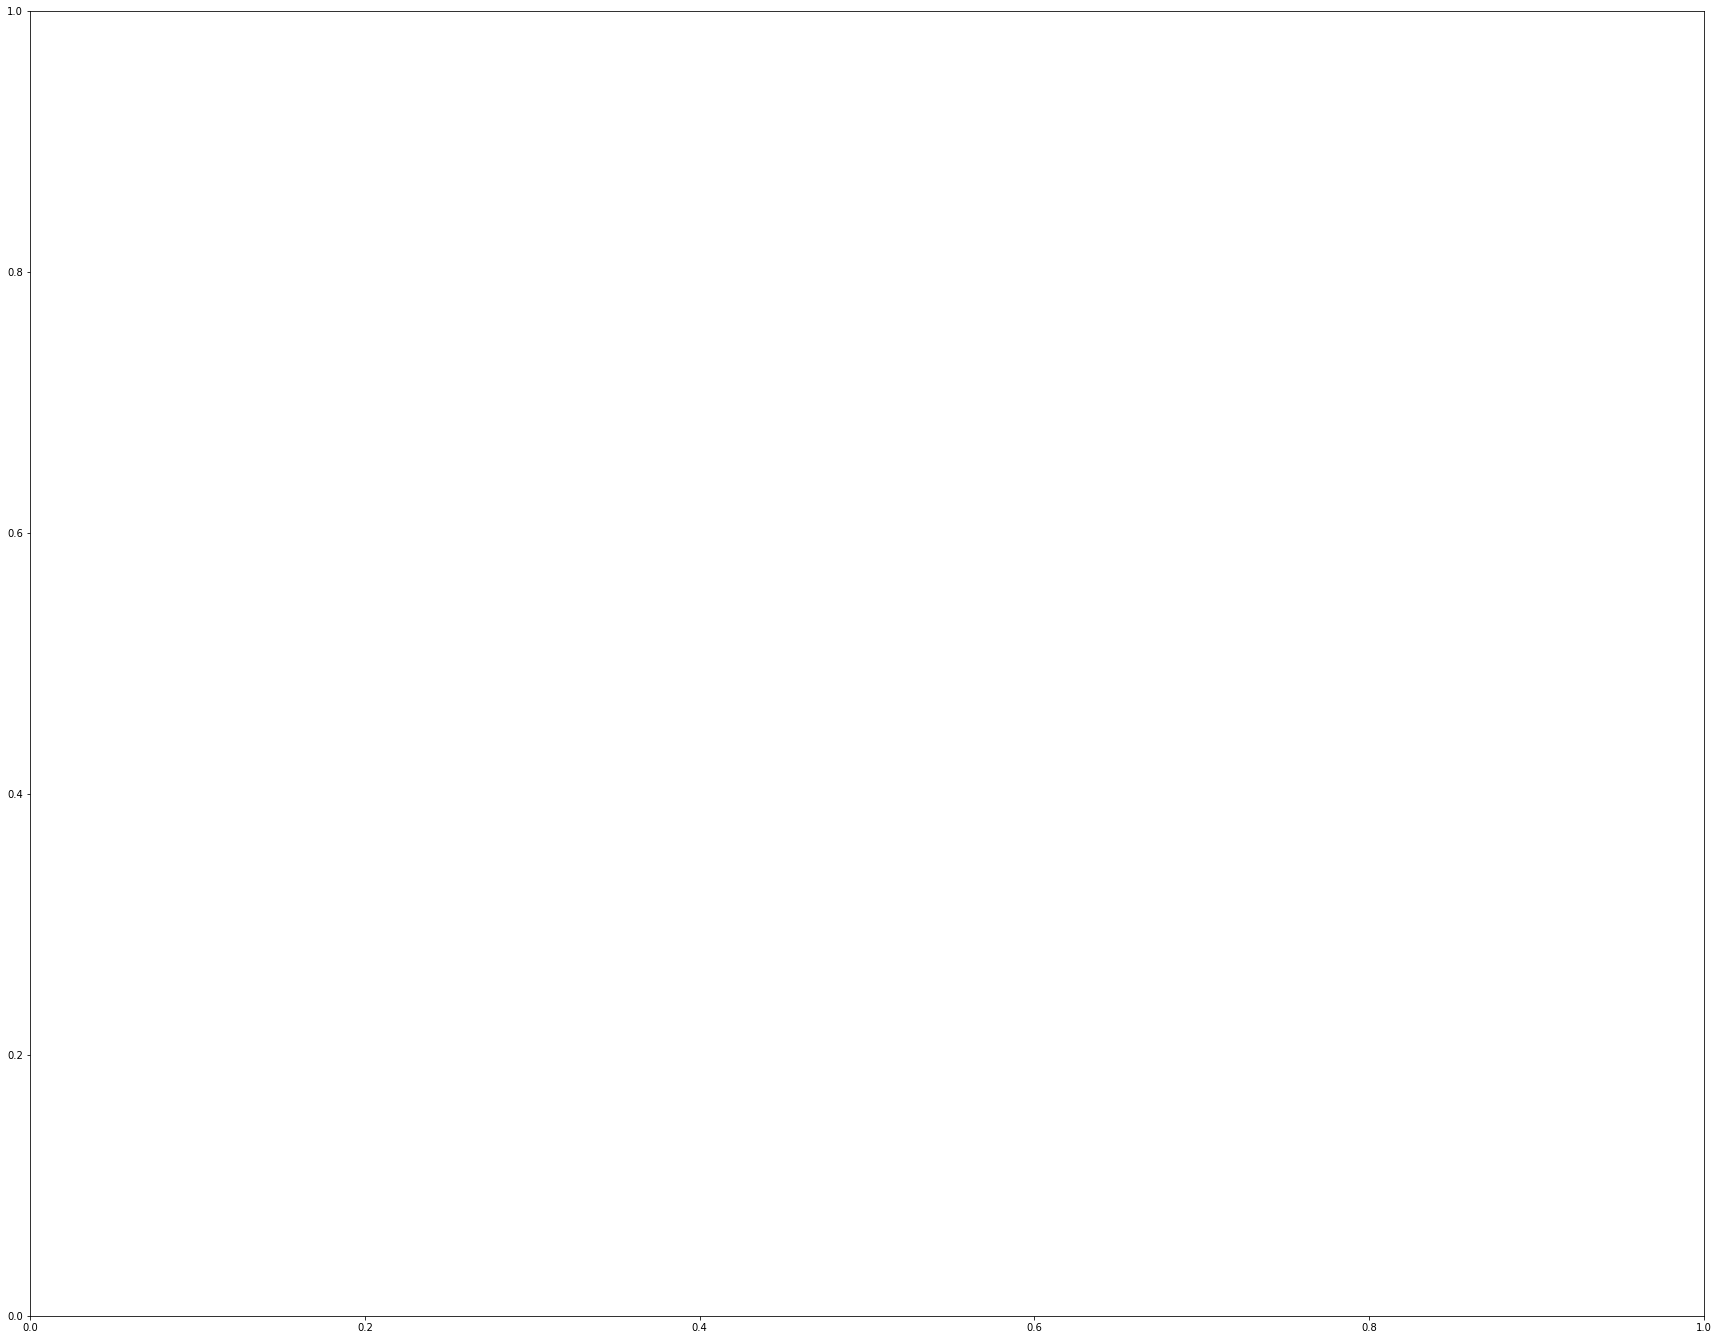

In [108]:
# f, ax = plt.subplots(figsize=(30,24))

# ax= sns.barplot(x= feature_score, y= feature_score.index, data= df_new)
# plt.show

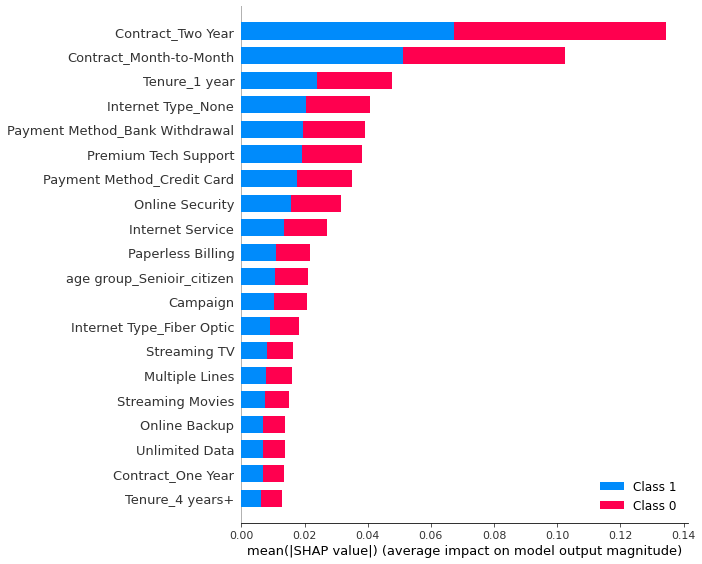

In [124]:
import shap
shap.initjs()
subset = X_valid.iloc[0:100]
explainer = shap.TreeExplainer(RF_model, subset)
# explainer = shap.KernelExplainer(lr_model.predict_proba, X_valid)
shap_values = explainer.shap_values(subset, check_additivity=False)
#shap.force_plot(shap_values[subset])
shap.summary_plot(shap_values, subset)

In [ ]:
model=RandomForestClassifier()
#hyper parameters set
params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
gsrf_result = model1.fit(X_train, Y_train)
print(gsrf_result.best_score_, gsrf_result.best_params_)
print(gsrf_result.best_estimator_)
predict7= model1.predict(X_valid)
RF_accuracy_tuned = accuracy_score(Y_valid, predict7)
rfp_tuned = precision_score(Y_valid,predict7)
rfr_tuned = recall_score(Y_valid,predict7)
rff1_tuned = f1_score(Y_valid,predict7)
print("RF accuracy:", RF_accuracy_tuned )

RFmatrix= confusion_matrix(Y_valid, predict7)
RFplt = ConfusionMatrixDisplay(RFmatrix)
RFplt.plot()
plt.title("RF Confusion Matrix")
plt.show
print(classification_report(Y_valid, predict7 ))

GBC accuracy: 0.9829545454545454
GBC accuracyh: 0.9900608519269777
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       803
           1       0.98      0.95      0.96       253

    accuracy                           0.98      1056
   macro avg       0.98      0.97      0.98      1056
weighted avg       0.98      0.98      0.98      1056



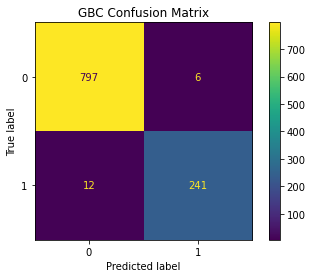

In [91]:
GBC_model= GradientBoostingClassifier()
GBC_model.fit(X_train, Y_train)
predict8= GBC_model.predict(X_valid)
GBC_accuracy = GBC_model.score(X_valid,Y_valid)
print("GBC accuracy:", GBC_accuracy )
GBC_accuracytr = GBC_model.score(X_train,Y_train)
print("GBC accuracyh:", GBC_accuracytr )
gbcp = precision_score(Y_valid,predict8)
gbcr = recall_score(Y_valid,predict8)
gbcf1 = f1_score(Y_valid,predict8)

GBCmatrix= confusion_matrix(Y_valid, predict8)
GBCplt = ConfusionMatrixDisplay(GBCmatrix)
GBCplt.plot()
plt.title("GBC Confusion Matrix")
plt.show
print(classification_report(Y_valid, predict8 ))

In [92]:
# model = GradientBoostingClassifier()
# n_estimators = [10, 100, 1000]
# learning_rate = [0.001, 0.01, 0.1]
# subsample = [0.5, 0.7, 1.0]
# max_depth = [3, 7, 9]
# # define grid search
# grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_train, Y_train)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# predict8= grid_search.predict(X_valid)
# GBC_accuracy_tuned = accuracy_score(Y_valid_predict8)
# print("GBC accuracy:", GBC_accuracy_tuned )

# GBCmatrix= confusion_matrix(Y_valid, predict8)
# GBCplt = ConfusionMatrixDisplay(GBCmatrix)
# GBCplt.plot()
# plt.title("GBC Confusion Matrix")
# plt.show
# print(classification_report(Y_valid, predict8 ))

DT accuracy: 0.9810606060606061
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       803
           1       0.97      0.95      0.96       253

    accuracy                           0.98      1056
   macro avg       0.98      0.97      0.97      1056
weighted avg       0.98      0.98      0.98      1056



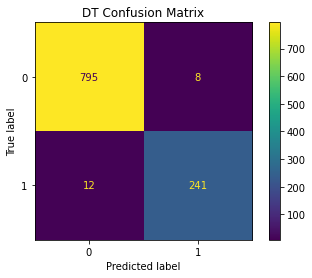

In [93]:
DT_model= DecisionTreeClassifier()
#DT_model= DecisionTreeClassifier(criterion= 'gini', max_depth= 9)
DT_model.fit(X_train, Y_train)
predict5= DT_model.predict(X_valid)
DT_accuracy = DT_model.score(X_valid,Y_valid)
print("DT accuracy:", DT_accuracy )
dtp = precision_score(Y_valid,predict5)
dtr = recall_score(Y_valid,predict5)
dtf1 = f1_score(Y_valid,predict5)

DTmatrix= confusion_matrix(Y_valid, predict5)
DTplt = ConfusionMatrixDisplay(DTmatrix)
DTplt.plot()
plt.title("DT Confusion Matrix")
plt.show
print(classification_report(Y_valid, predict5 ))

DT accuracy: 0.9611742424242424
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       803
           1       0.95      0.88      0.92       253

    accuracy                           0.96      1056
   macro avg       0.96      0.93      0.95      1056
weighted avg       0.96      0.96      0.96      1056

0.9519269776876268 {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 123}
DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features='auto',
                       min_samples_leaf=2, random_state=123)


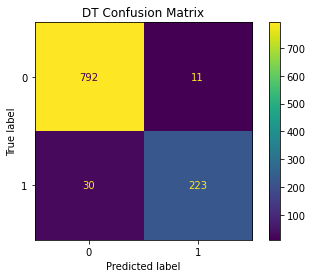

In [94]:
model= DecisionTreeClassifier(random_state=1234)
#Hyper Parameters Set
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123],
         'criterion':['gini', 'entropy'],
         'max_depth':[2,3,5,7,9,10]}
#Making models with hyper parameters sets
dmodel = GridSearchCV(model, param_grid=params, n_jobs=-1)
gsdt_result = dmodel.fit(X_train, Y_train)
predict5= dmodel.predict(X_valid)
DT_accuracy_tuned = dmodel.score(X_valid,Y_valid)
print("DT accuracy:", DT_accuracy_tuned )
dtp_tuned = precision_score(Y_valid,predict5)
dtr_tuned = recall_score(Y_valid,predict5)
dtf1_tuned = f1_score(Y_valid,predict5)

DTmatrix= confusion_matrix(Y_valid, predict5)
DTplt = ConfusionMatrixDisplay(DTmatrix)
DTplt.plot()
plt.title("DT Confusion Matrix")
plt.show
print(classification_report(Y_valid, predict5 ))
print(gsdt_result.best_score_, gsdt_result.best_params_)
print(gsdt_result.best_estimator_)

In [98]:
data= {'Classifier':['DecisionTree','DecisionTree_Tuned', 'log-regression','log-regression_Tuned', 'RandomForest','RandomForest_Tuned', 'gradient boost'], 'Accuracy_Score':[DT_accuracy,DT_accuracy_tuned, lr_accuracy,lr_accuracy_tuned, RF_accuracy,RF_accuracy_tuned, GBC_accuracy], 'Precision Score':[dtp,dtp_tuned,lrp, lrp_tuned,rfp, rfp_tuned, gbcp], 'Recall Score':[dtr,dtr_tuned,lrr, lrr_tuned,rfr, rfr_tuned, gbcr], 'F1 Score':[dtf1,dtf1_tuned,lrf1, lrf1_tuned,rff1, rff1_tuned, gbcf1]}
# accuracy = pd.DataFrame(data)
scores = pd.DataFrame(data)
scores
#accuracy.sort_values(by= "Recall Score", ascending= False)

Classifier  Accuracy_Score  Precision Score  Recall Score  \
0          DecisionTree        0.981061         0.967871      0.952569   
1    DecisionTree_Tuned        0.961174         0.952991      0.881423   
2        log-regression        0.980114         0.971545      0.944664   
3  log-regression_Tuned        0.983902         0.972000      0.960474   
4          RandomForest        0.982955         0.987552      0.940711   
5    RandomForest_Tuned        0.983902         0.983607      0.948617   
6        gradient boost        0.982955         0.975709      0.952569   

   F1 Score  
0  0.960159  
1  0.915811  
2  0.957916  
3  0.966203  
4  0.963563  
5  0.965795  
6  0.964000

In [115]:
from sklearn.metrics import mean_squared_error
from sklearn import tree
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(training_data=np.array(X_train), mode='classification', feature_names=X_train.columns)
# storing a new observation
i = 6
X_observation = X_valid.iloc[20]

# RF prediction: {RF_model.predict(X_observation)[0]}

In [122]:
# explanation using the random forest model
explanation = explainer.explain_instance(data_row=X_valid.iloc[20],predict_fn=RF_model.predict_proba, num_features=10)
explanation.show_in_notebook(show_table=True, show_all=False)
print(explanation.score)

0.6358978923362617
